FINALIZED CAPSTONE PROJECT SUBMISSION: AJIT JAIN

In [1]:
# Initialize necessary libraries and tools for data sanitization, data framing, visualization, statistical stationarity analysis,
# linear regression, classification, and machine learning tools.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots
import time

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression, Lasso
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, mean_squared_error, classification_report, 
                             ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures, 
                                   OneHotEncoder, OrdinalEncoder, LabelEncoder)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_text

from sklearn import set_config, metrics
set_config(display="diagram")

In [2]:
# Import raw data collated from various sources into csv format, primarily imported from FRED Excel add-in, Nasdaq data linq and yahoo finance

df = pd.read_csv('C:\\ml\MLAI\\fred.csv')

# Import reclassified data for data visualization.
df_sns = pd.DataFrame(pd.read_csv('C:\\ml\MLAI\\fred_sns.csv'))

# Import trimmed data for advanced regression and classification exercises. These data are essentially reclassified fields from df above into ordinal categories.

data = pd.DataFrame(pd.read_csv('C:\\ml\MLAI\\fred_clsf.csv'))

df = pd.DataFrame(df)
df.isna().sum()

Date                              0
Hours                             0
Wages                             0
Labor Productivity                0
Labor Participation               0
Industrial Production             0
Capacity Utilization              0
Inventories                       0
Retail Sales                      0
LMV Sales                         0
Durable Goods Orders              0
Comm & Ind loans                  0
Consumer Credit                   0
CPI                               0
CPI Food                          0
CPI Energy                        0
PCE                               0
PCE ex Food & Energy              0
PPI Finished Goods                0
PPI Fin Goods ex Food & Energy    0
PPI Processed Goods               0
PPI Unprocessed Goods             0
House Price Index                 0
WTI Crude                         0
M1                                0
M2                                0
VIX Index                         0
IG Index                    

In [3]:
# Convert formatting to datetime.
df_sns['Date'] = pd.to_datetime(df_sns['Date'])

C:\Users\ajain\AppData\Local\Temp\ipykernel_1616\2930325566.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sns['Date'] = pd.to_datetime(df_sns['Date'])


In [4]:
# This section of the code bins data fields for better data visualization.

# US10Y govt. bond yield - Fed Funds effective rate curve spread bin changes Q-O-Q
curve_spd_bins = [-1.5,0,1.5,np.inf]
df_sns['curve_spd_bins'] = pd.cut(df_sns['US10-FedFunds'],bins = curve_spd_bins)
curve_bins = [-1.5,-0.25,0,0.25,1.5,np.inf]

# Absolute value of the US10Y govt. bond yield - Fed funds effective rate from prior quarter
df_sns['curve_bins'] = pd.cut(df_sns['US10-FedFunds [abs, prior]'],bins = curve_bins)

# Bin of oil price changes Q-o-Q
oil_bins = [-np.inf,-0.25,-0.1,0,0.1,0.25,np.inf]
df_sns['oil_bins'] = pd.cut(df_sns['WTI Crude'],bins = oil_bins)

# Bin of real GDP changes Q-o-Q
gdp_bins = [-0.05,-0.01,0,0.015,0.05]
df_sns['gdp_bins'] = pd.cut(df_sns['Real GDP'],bins = gdp_bins)

# Bin of wage changes Q-o-Q
wage_bins = [-0.02,0,0.02,0.04]
df_sns['wage_bins'] = pd.cut(df_sns['Wages'],bins = wage_bins)

# Bin of industrial production change Q-o-Q
ip_bins = [-0.15,-0.02,0,0.02,0.1]
df_sns['ip_bins'] = pd.cut(df_sns['Industrial Production'],bins = ip_bins)

# Bin of retail sales changes Q-o-Q
rs_bins = [-0.1,-0.02,0,0.02,0.05,np.inf]
df_sns['rs_bins'] = pd.cut(df_sns['Retail Sales'],bins = rs_bins)

# Bin of light motor vehicle sales changes Q-o-Q
auto_bins = [-np.inf,-0.1,-0.02,0,0.02,0.1,np.inf]
df_sns['auto_bins'] = pd.cut(df_sns['LMV Sales'],bins = auto_bins)

# Bin of Consumer Price Inflation changes Q-o-Q
cpi_bins = [-0.025,-0.005,0.005,0.025]
df_sns['cpi_bins'] = pd.cut(df_sns['CPI'],bins = cpi_bins)

# Bin of house price changes Q-o-Q
hpx_bins = [-0.05,-0.01,0,0.01,0.05,np.inf]
df_sns['hpx_bins'] = pd.cut(df_sns['House Price Index'],bins = hpx_bins)

# Bin of Personal COnsumption Expenditure changes Q-o-Q
pce_bins = [-0.1,-0.02,0,0.02,0.1]
df_sns['pce_bins'] = pd.cut(df_sns['Real PCE'],bins = pce_bins)

# Bin of VIX Index (Volatility Index) changes Q-o-Q
vix_bins = [-0.15,-0.05,0,0.05,0.15,0.4]
df_sns['vix_bins'] = pd.cut(df_sns['VIX Index'],bins = vix_bins)

# Bin of Corporate Bond BBB rated bond spread changes Q-o-Q
bbb_bins = [-1.5,-0.5,0,0.5,2]
df_sns['bbb_bins'] = pd.cut(df_sns['BBB Yield'],bins = bbb_bins)

# Bin of US Govt. 10y bond spread changes Q-o-Q
ust_bins = [-1,-0.25,0,0.25,1.5]
df_sns['ust_bins'] = pd.cut(df_sns['US10Y'],bins = ust_bins)

# Bin of time with every 5 years making a new bin
years_per_bin = 5
df_sns['years_bin'] = (df_sns['Date'].dt.year//years_per_bin * years_per_bin).astype(str) + '-' + ((df_sns['Date'].dt.year//years_per_bin + 1)*years_per_bin - 1).astype(str)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


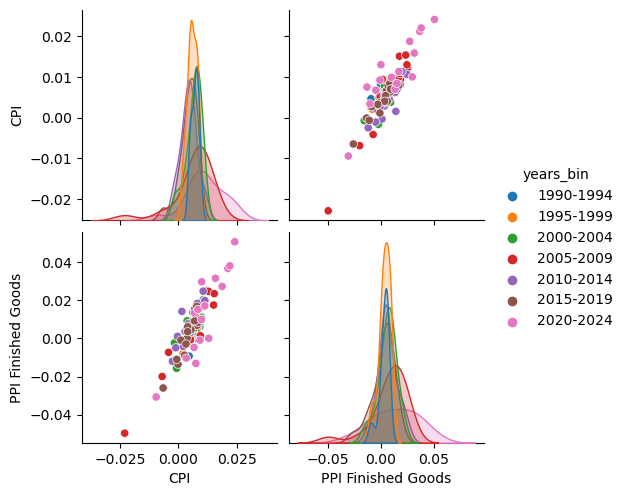

In [5]:
# Scatter plot of CPI vs. PPI Finished Goods (Consumer price inflation vs. Producer Price Inflation - finished goods) change Q-o-Q
cols1 = ['CPI','PPI Finished Goods']
sns.pairplot(df_sns,vars = cols1,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


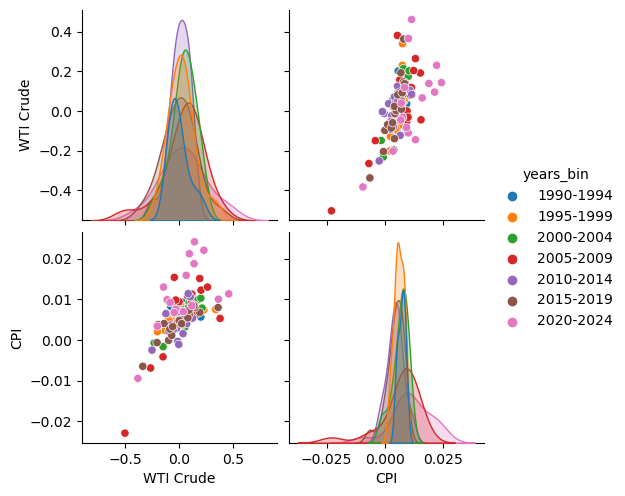

In [6]:
# Scatter plot of Consumer Price Inflation and WTI Crude Oil Price change Q-o-Q
cols1_a = ['WTI Crude','CPI']
sns.pairplot(df_sns,vars = cols1_a,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features but tends to break down at very high crude oil prices and may not be very consistent. Further evaluation to follow.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


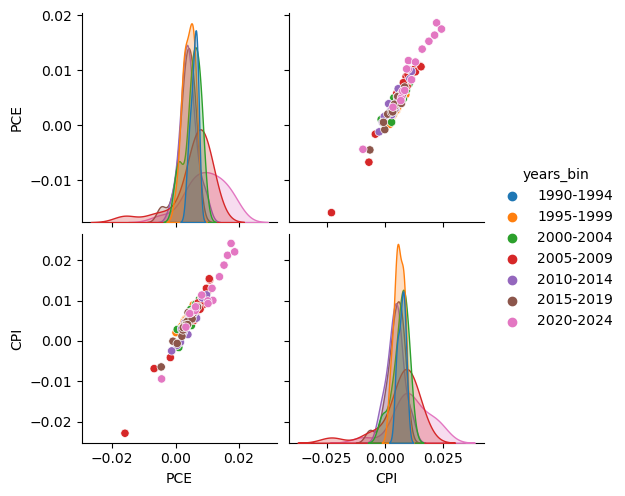

In [7]:
# Scatter plot of Consumer Price Inflation and Personal COnsumption Expenditure change Q-o-Q
cols1_b = ['PCE','CPI']
sns.pairplot(df_sns,vars = cols1_b,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


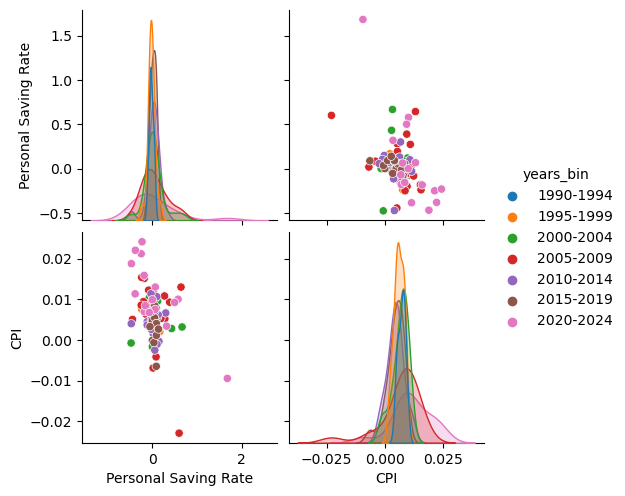

In [8]:
# Scatter plot of Consumer Price Inflation and Personal Savings Rate of households change Q-o-Q
cols1_c = ['Personal Saving Rate','CPI']
sns.pairplot(df_sns,vars = cols1_c,hue = 'years_bin')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


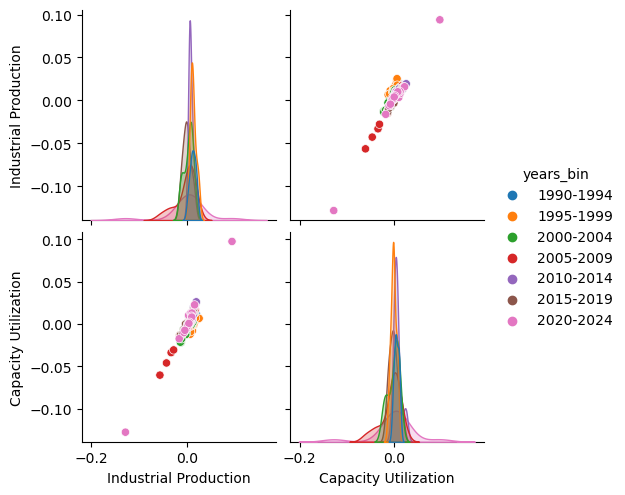

In [9]:
# Scatter plot of Industrial Production vs Capacity Utilization change Q-o-Q
cols1_d = ['Industrial Production','Capacity Utilization']
sns.pairplot(df_sns,vars = cols1_d,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


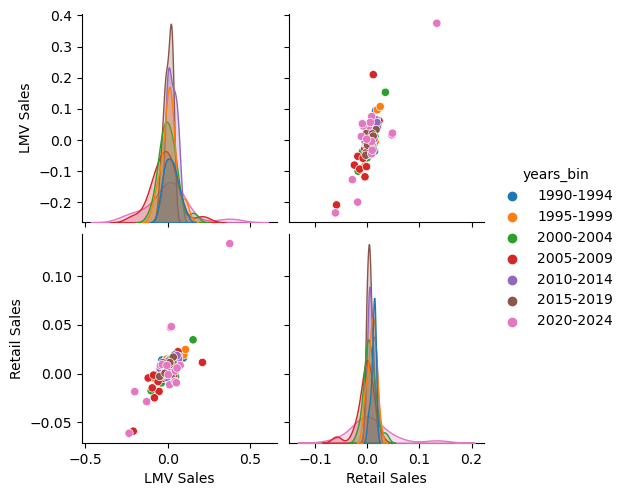

In [10]:
# Scatter plot of Retail sales vs LMV sales change Q-o-Q
cols1_e = ['LMV Sales','Retail Sales']
sns.pairplot(df_sns,vars = cols1_e,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


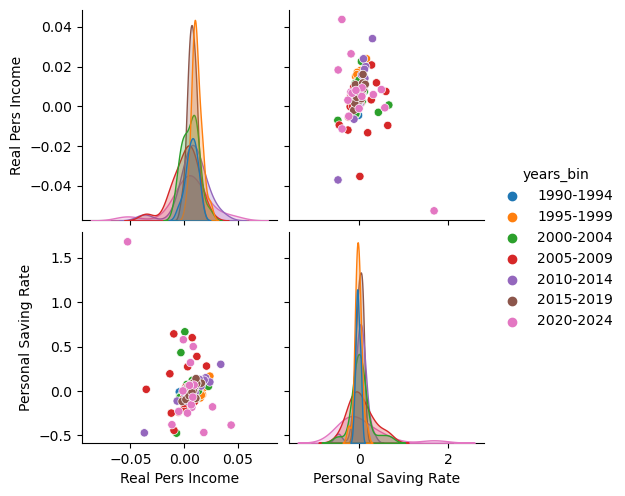

In [11]:
# Scatter plot of Real personal income vs Personal Savings rate change Q-o-Q
cols1_f = ['Real Pers Income','Personal Saving Rate']
sns.pairplot(df_sns,vars = cols1_f,hue = 'years_bin')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


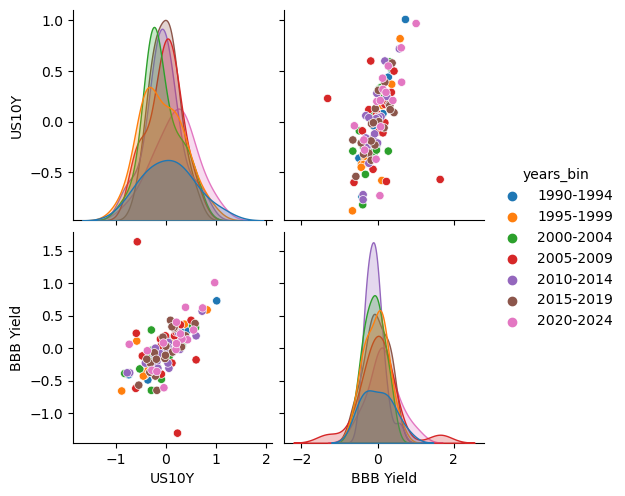

In [12]:
# Scatter plot of US10Y Govt. bond yield vs. Corporate BBB spread change Q-o-Q
cols1_g = ['US10Y','BBB Yield']
sns.pairplot(df_sns,vars = cols1_g,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


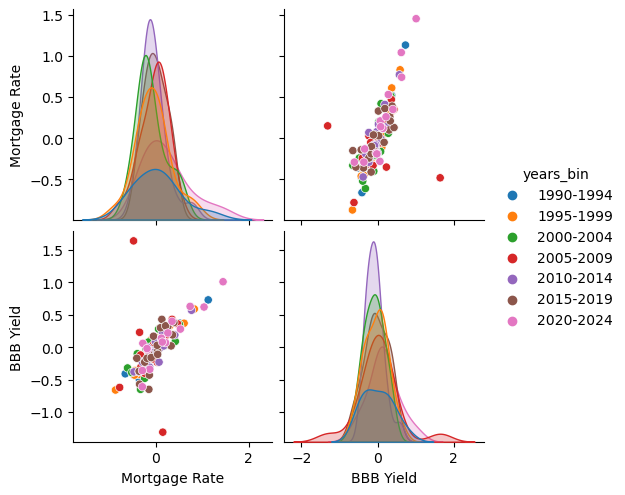

In [13]:
# Scatter plot of Housing mortgage borrowing rate vs Capacity Utilization change Q-o-Q
cols1_h = ['Mortgage Rate','BBB Yield']
sns.pairplot(df_sns,vars = cols1_h,hue = 'years_bin')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


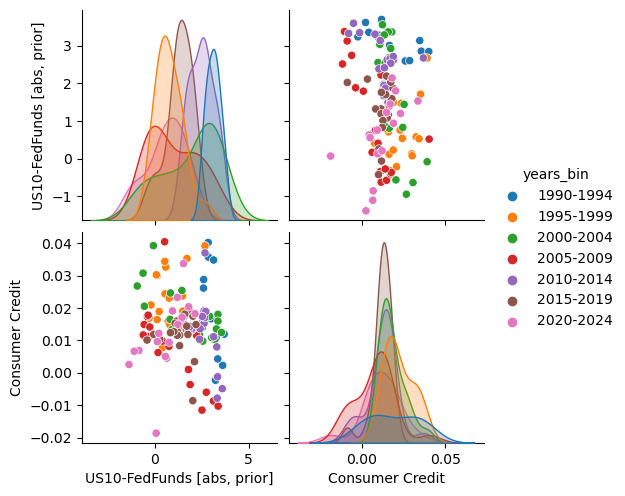

In [14]:
# Scatter plot of prior quarter absolute spread of US10Y govt. yield - Fed funds rate vs consumer credit change Q-o-Q
cols1_i = ['US10-FedFunds [abs, prior]','Consumer Credit']
sns.pairplot(df_sns,vars = cols1_i,hue = 'years_bin')

Visually: The above relationship is more nuanced with very different set of relationship terms during each of the 5 year spans: which makes sense. For example, the relationship during recession years is different from the relationship during growth years. It may make sense to classify by recession and no recession.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


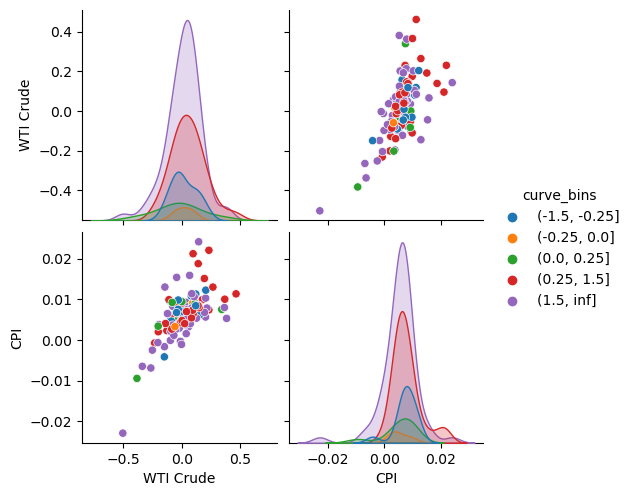

In [15]:
# Scatter plot of WTI Crude oil price vs consumer price index change Q-o-Q by. US10Y-Fed funds rate change curve bins
cols2 = ['WTI Crude','CPI']
sns.pairplot(df_sns,vars = cols2,hue = 'curve_bins')

Visually: There seems to be a statistical correlated relationship the above 2 features but is inconsistent at the tails.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


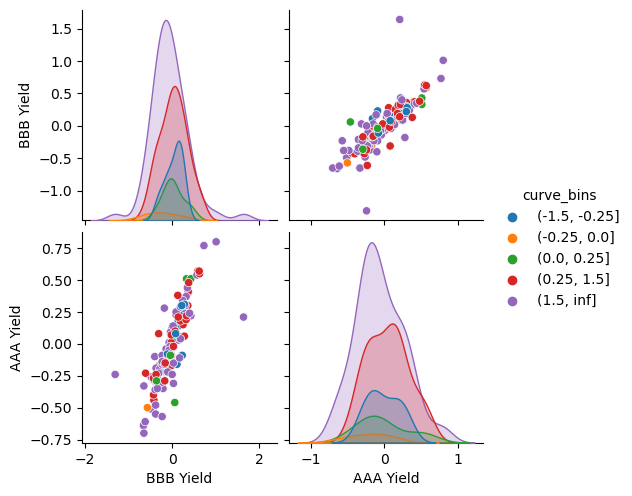

In [16]:
# Scatter plot of Corporate BBB yield vs Corporate AAA yield change Q-o-Q by. US10Y-Fed funds rate change curve bins
cols3 = ['BBB Yield','AAA Yield']
sns.pairplot(df_sns,vars = cols3,hue = 'curve_bins')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


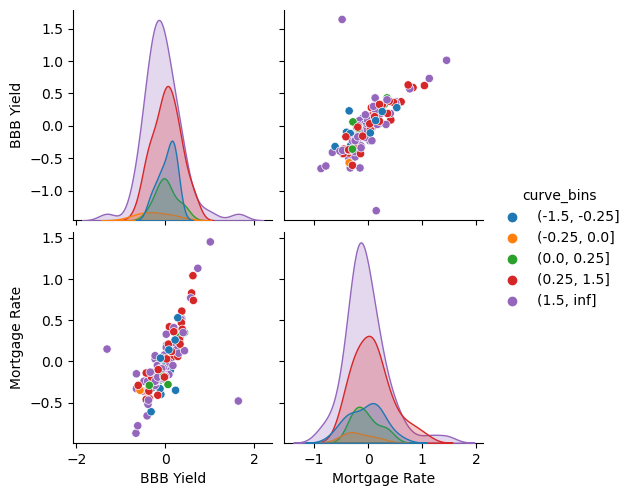

In [17]:
# Scatter plot of Corporate BBB yield vs housing mortgage borrowing rate change Q-o-Q by. US10Y-Fed funds rate change curve bins
cols4 = ['BBB Yield','Mortgage Rate']
sns.pairplot(df_sns,vars = cols4, hue = 'curve_bins')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


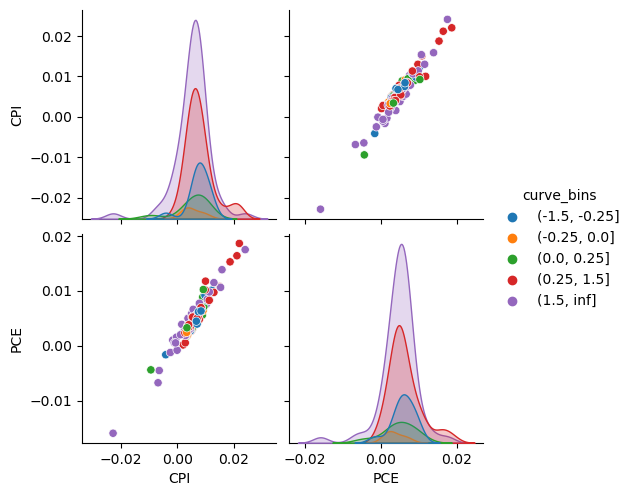

In [18]:
# Scatter plot of Consumer Price Inflation vs. Personal COnsumption Expenditures change Q-o-Q  by. US10Y-Fed funds rate change curve bins
cols5 = ['CPI','PCE']
sns.pairplot(df_sns,vars = cols5, hue = 'curve_bins')

Visually: There seems to be a statistical correlated relationship the above 2 features

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


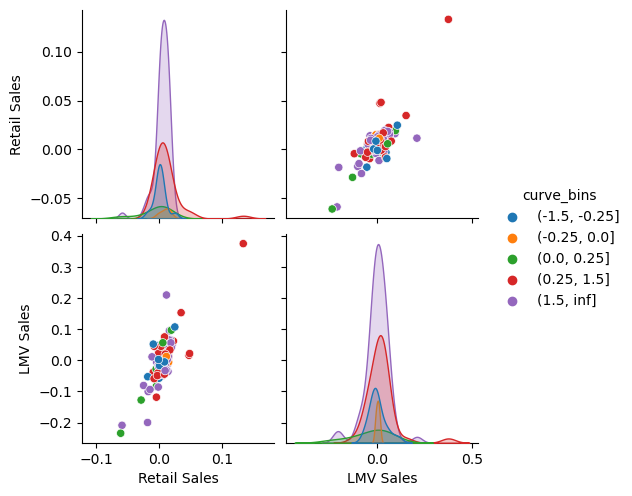

In [19]:
# Scatter plot of Retail Sales vs LMV Sales change Q-o-Q by. US10Y-Fed funds rate change curve bins
cols6 = ['Retail Sales','LMV Sales']
sns.pairplot(df_sns,vars = cols6, hue = 'curve_bins')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


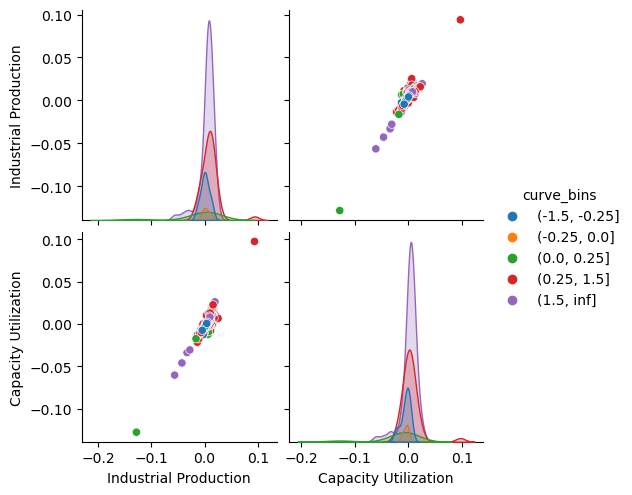

In [20]:
# Scatter plot of Industrial Production vs Capacity Utilization change Q-o-Q by. US10Y-Fed funds rate change curve bins
cols7 = ['Industrial Production','Capacity Utilization']
sns.pairplot(df_sns,vars = cols7, hue = 'curve_bins')

Visually: There seems to be a statistical correlated relationship the above 2 features

In [21]:
# Reformatting, cleaning data and converting original data frame into % change period over period values for all features
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df_pct_change = df.pct_change()
df_pct_change = pd.DataFrame(df_pct_change)
df_pct_change.index = df.index
df_pct_change.dropna(inplace=True)

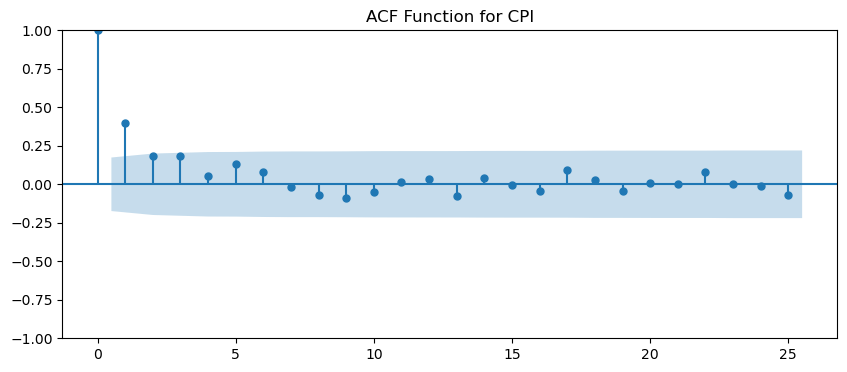

In [22]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(df_pct_change['CPI'],lags = 25, ax =ax)
plt.title('ACF Function for CPI')
plt.show()

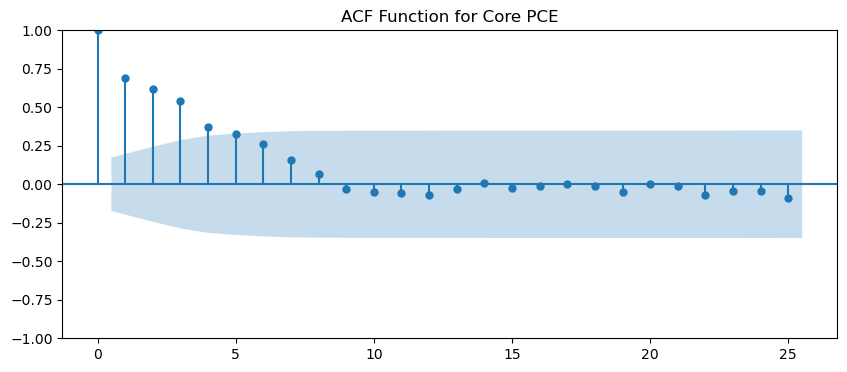

In [23]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(df_pct_change['PCE ex Food & Energy'],lags = 25, ax =ax)
plt.title('ACF Function for Core PCE')
plt.show()

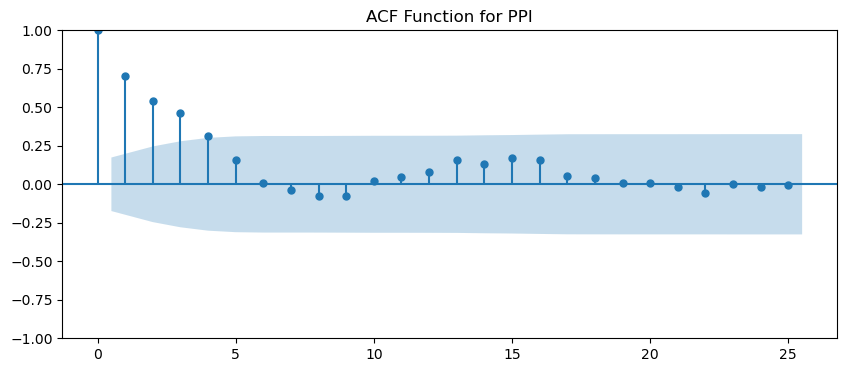

In [24]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(df_pct_change['PPI Fin Goods ex Food & Energy'],lags = 25, ax =ax)
plt.title('ACF Function for PPI')
plt.show()

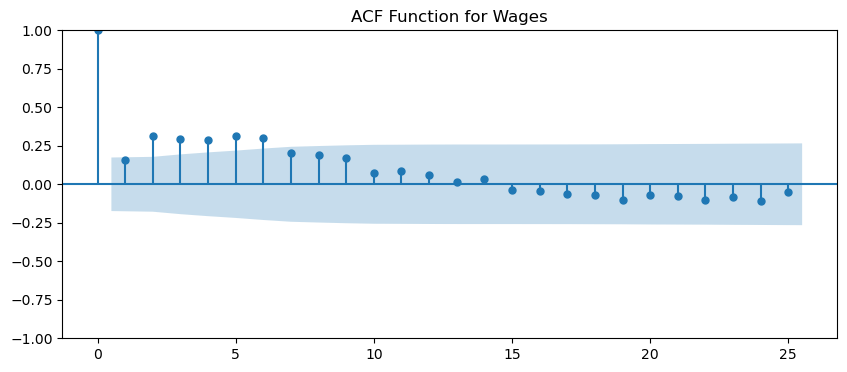

In [25]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(df_pct_change['Wages'],lags = 25, ax =ax)
plt.title('ACF Function for Wages')
plt.show()

In [26]:
ppi_pce = df_pct_change['PPI Fin Goods ex Food & Energy'] - df_pct_change['PCE ex Food & Energy']
ppi_cpi = df_pct_change['PPI Fin Goods ex Food & Energy'] - df_pct_change['CPI']
wages_cpi = df_pct_change['Wages'] - df_pct_change['CPI']
ip_cu = df_pct_change['Industrial Production'] - df_pct_change['Capacity Utilization']
retail_lmv  = df_pct_change['Retail Sales'] - df_pct_change['LMV Sales']
income_savings = df_pct_change['Real Pers Income'] - df_pct_change['Personal Saving Rate']
gv_bbb = df_pct_change['US10Y'] - df_pct_change['BBB Yield']

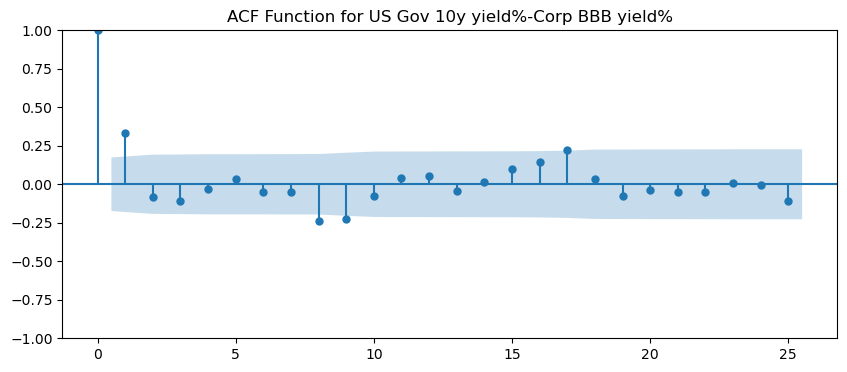

In [27]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(gv_bbb,lags = 25, ax =ax)
plt.title('ACF Function for US Gov 10y yield%-Corp BBB yield%')
plt.show()

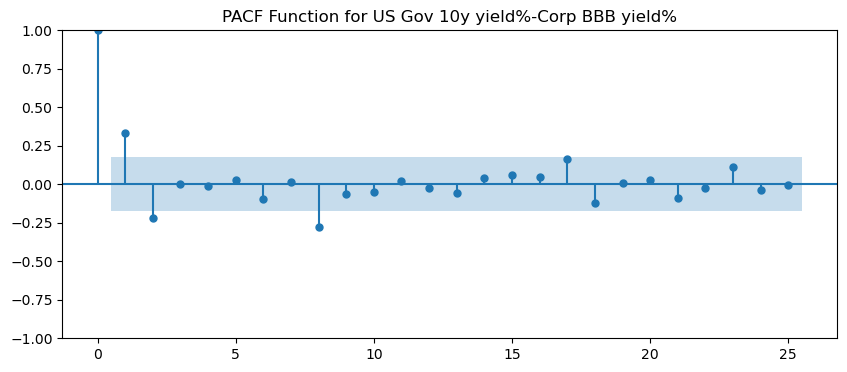

In [28]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(gv_bbb,lags = 25, ax =ax)
plt.title('PACF Function for US Gov 10y yield%-Corp BBB yield%')
plt.show()

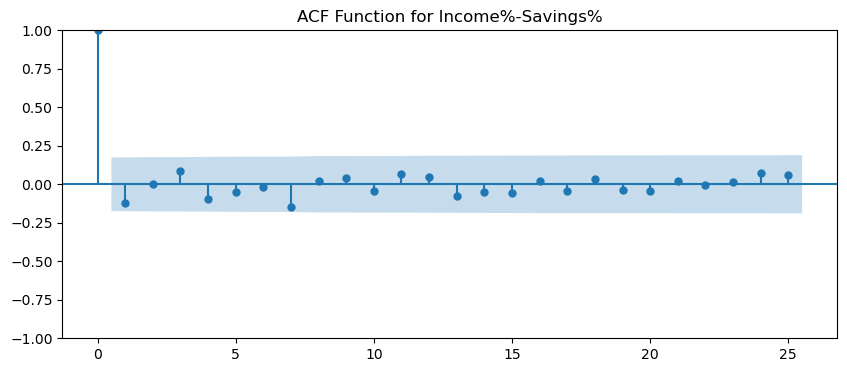

In [29]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(income_savings,lags = 25, ax =ax)
plt.title('ACF Function for Income%-Savings%')
plt.show()

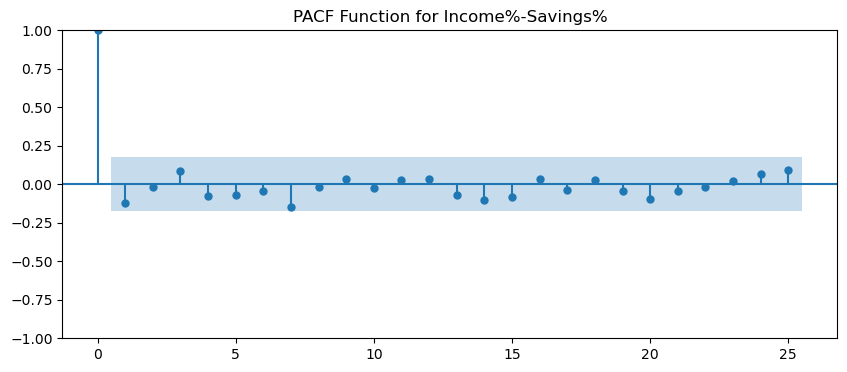

In [30]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(income_savings,lags = 25, ax =ax)
plt.title('PACF Function for Income%-Savings%')
plt.show()

Visually: Both ACF and PACF indicate good likelihood of stationarity in the series which means, one may consider the possibility that the 2 series are cointegrated: if one moves, the other would eventually 'catch up' to that move in some quantitative manner. This is useful for gaining better understanding of economy and markets.

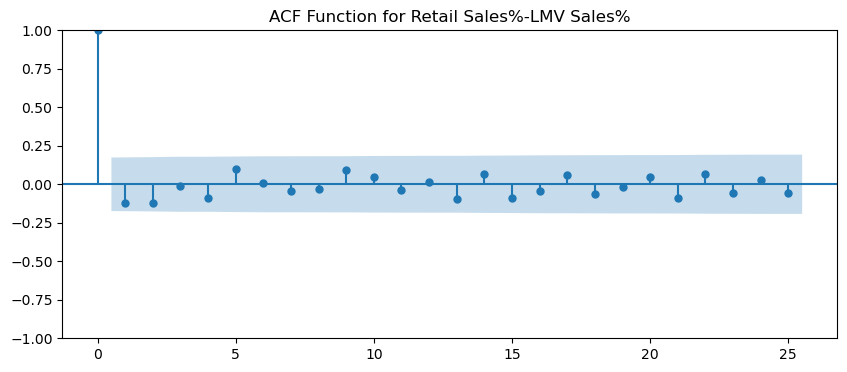

In [31]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(retail_lmv,lags = 25, ax =ax)
plt.title('ACF Function for Retail Sales%-LMV Sales%')
plt.show()

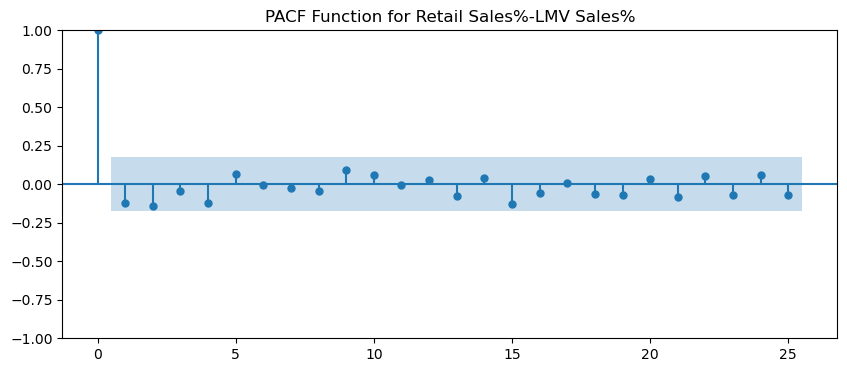

In [32]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(retail_lmv,lags = 25, ax =ax)
plt.title('PACF Function for Retail Sales%-LMV Sales%')
plt.show()

Visually: Both ACF and PACF indicate good likelihood of stationarity in the series which means, one may consider the possibility that the 2 series are cointegrated: if one moves, the other would eventually 'catch up' to that move in some quantitative manner. This is useful for gaining better understanding of economy and markets.

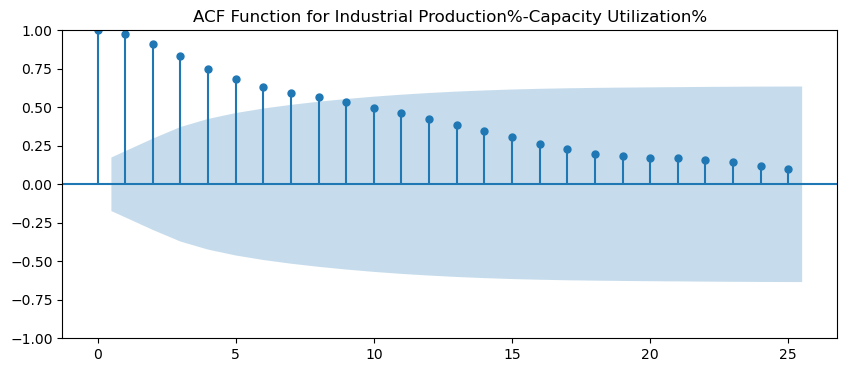

In [33]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(ip_cu,lags = 25, ax =ax)
plt.title('ACF Function for Industrial Production%-Capacity Utilization%')
plt.show()

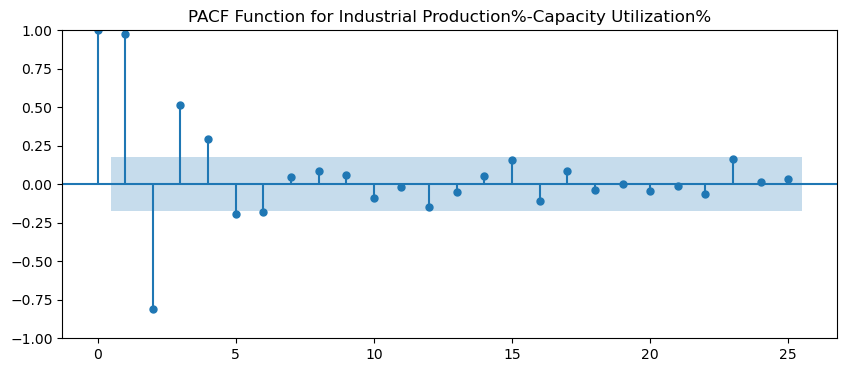

In [34]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(ip_cu,lags = 25, ax =ax)
plt.title('PACF Function for Industrial Production%-Capacity Utilization%')
plt.show()

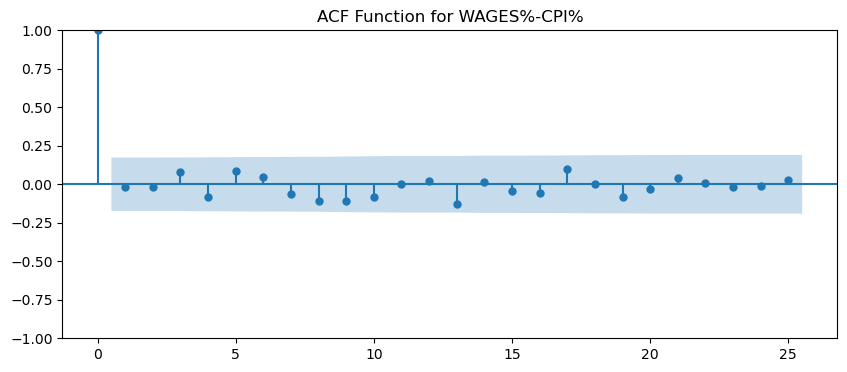

In [35]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(wages_cpi,lags = 25, ax =ax)
plt.title('ACF Function for WAGES%-CPI%')
plt.show()

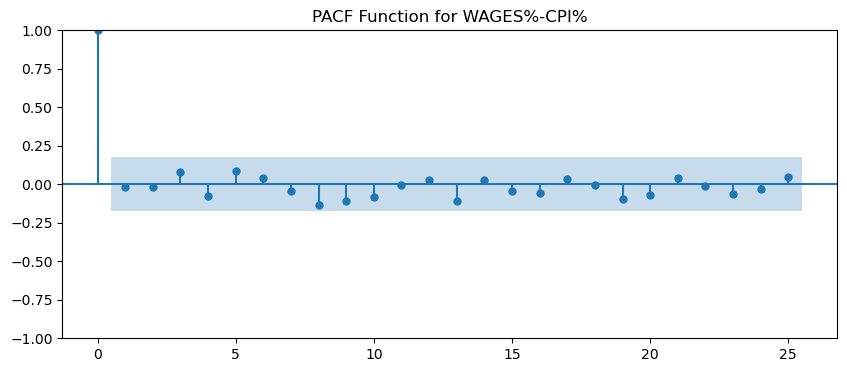

In [36]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(wages_cpi,lags = 25, ax =ax)
plt.title('PACF Function for WAGES%-CPI%')
plt.show()

Visually: Both ACF and PACF indicate good likelihood of stationarity in the series which means, one may consider the possibility that the 2 series are cointegrated: if one moves, the other would eventually 'catch up' to that move in some quantitative manner. This is useful for gaining better understanding of economy and markets.

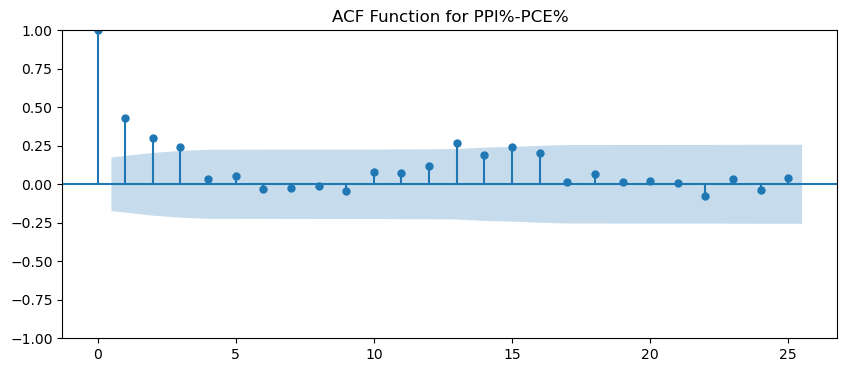

In [37]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(ppi_pce,lags = 25, ax =ax)
plt.title('ACF Function for PPI%-PCE%')
plt.show()

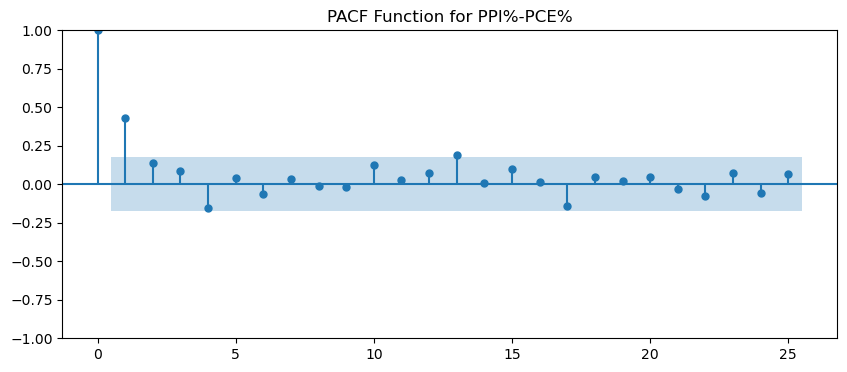

In [38]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(ppi_pce,lags = 25, ax =ax)
plt.title('PACF Function for PPI%-PCE%')
plt.show()

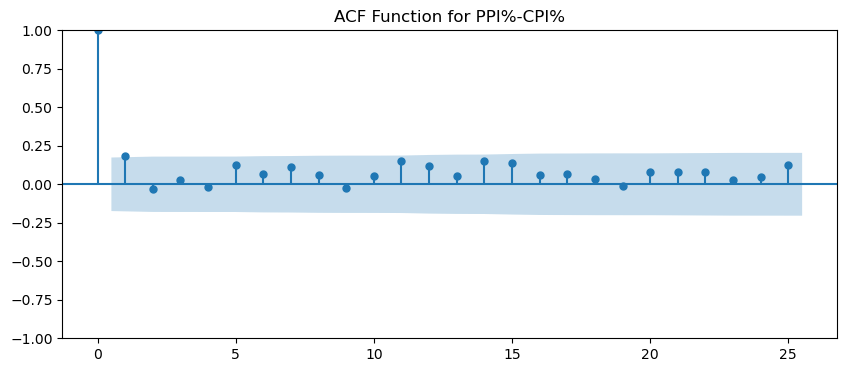

In [39]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_acf(ppi_cpi,lags = 25, ax =ax)
plt.title('ACF Function for PPI%-CPI%')
plt.show()

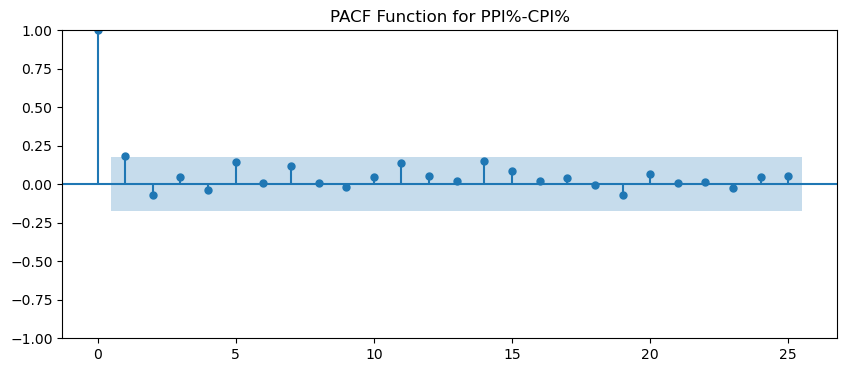

In [40]:
fig, ax = plt.subplots(figsize = (10,4))
tsaplots.plot_pacf(ppi_cpi,lags = 25, ax =ax)
plt.title('PACF Function for PPI%-CPI%')
plt.show()

Visually: Both ACF and PACF indicate good likelihood of stationarity in the series which means, one may consider the possibility that the 2 series are cointegrated: if one moves, the other would eventually 'catch up' to that move in some quantitative manner. This is useful for gaining better understanding of economy and markets.

In [41]:
features = df[['Hours','Wages','Labor Productivity','Labor Participation','Industrial Production','Capacity Utilization','Inventories',
                'Retail Sales','LMV Sales','Durable Goods Orders','Comm & Ind loans','Consumer Credit','CPI','CPI Food','CPI Energy',
                    'PCE','PCE ex Food & Energy','PPI Finished Goods','PPI Fin Goods ex Food & Energy','PPI Processed Goods',
                        'PPI Unprocessed Goods','House Price Index','WTI Crude','M1','M2','VIX Index','IG Index',
                            'HY Index','Fed Funds','US10Y','AAA Yield','BBB Yield','Mortgage Rate','Real GDP','Real PCE',
                                'Real Private Investment','Real Pot GDP','Real Pers Income','Personal Saving Rate']]

In [42]:
# Applying standardization to the data.

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pct_change)
scaled_features_df = pd.DataFrame(scaled_features)
scaled_features_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
count,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,...,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02,1.270000e+02
mean,-9.616105e-18,9.528686e-17,-5.769663e-17,-2.076204e-18,-2.229188e-17,1.573544e-17,1.258836e-16,2.491445e-17,1.491589e-17,3.507693e-17,...,7.430627e-18,2.622574e-18,2.185478e-17,-2.185478e-17,-3.453056e-17,3.059670e-18,4.567650e-17,-1.621625e-16,2.207333e-17,7.867722e-18
std,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,...,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00,1.003960e+00
min,-6.306527e+00,-3.779177e+00,-2.326902e+00,-8.489139e+00,-7.160389e+00,-6.817081e+00,-3.660657e+00,-3.748195e+00,-3.563378e+00,-4.207792e+00,...,-3.819758e+00,-2.353413e+00,-2.635653e+00,-1.906605e+00,-7.413283e+00,-7.555102e+00,-4.356298e+00,-1.325741e+00,-5.235520e+00,-2.039942e+00
25%,-3.149517e-01,-5.090722e-01,-6.054113e-01,-2.668240e-01,-1.960987e-01,-2.347365e-01,-2.941894e-01,-3.536600e-01,-3.947063e-01,-3.396510e-01,...,-5.045189e-01,-5.860697e-01,-6.310652e-01,-6.448981e-01,-2.014002e-01,-2.424839e-01,-4.582072e-01,-6.780698e-01,-3.536567e-01,-3.984991e-01
50%,1.200169e-03,-1.049159e-01,-6.059789e-03,1.014303e-01,1.334264e-01,7.189364e-02,5.369060e-02,-1.873667e-02,1.265919e-02,3.199228e-02,...,-7.945934e-02,-1.677187e-01,-4.309935e-02,-1.607452e-01,9.025572e-03,3.951573e-03,-1.993899e-02,-4.202864e-01,1.105047e-01,-6.863342e-02
75%,3.173520e-01,3.566808e-01,4.713196e-01,4.740589e-01,3.919997e-01,3.844240e-01,4.292188e-01,3.443769e-01,4.432657e-01,4.732989e-01,...,4.115860e-01,5.817456e-01,5.464281e-01,4.400617e-01,3.137814e-01,2.477791e-01,4.925959e-01,2.786814e-01,4.072010e-01,1.987253e-01
max,5.635621e+00,7.430691e+00,6.250970e+00,3.202488e+00,4.850843e+00,5.183821e+00,3.514868e+00,7.203416e+00,5.547919e+00,4.844013e+00,...,3.682235e+00,3.806278e+00,4.189684e+00,5.367295e+00,6.194461e+00,6.646970e+00,4.986039e+00,2.631407e+00,3.332473e+00,6.891602e+00


In [43]:
col_names = ['Hours','Wages','Labor Productivity','Labor Participation','Industrial Production','Capacity Utilization','Inventories',
                'Retail Sales','LMV Sales','Durable Goods Orders','Comm & Ind loans','Consumer Credit','CPI','CPI Food','CPI Energy',
                    'PCE','PCE ex Food & Energy','PPI Finished Goods','PPI Fin Goods ex Food & Energy','PPI Processed Goods',
                        'PPI Unprocessed Goods','House Price Index','WTI Crude','M1','M2','VIX Index','IG Index',
                            'HY Index','Fed Funds','US10Y','AAA Yield','BBB Yield','Mortgage Rate','Real GDP','Real PCE',
                                'Real Private Investment','Real Pot GDP','Real Pers Income','Personal Saving Rate']
scaled_features_df.columns = col_names
scaled_features_df

,Hours,Wages,Labor Productivity,Labor Participation,Industrial Production,Capacity Utilization,Inventories,Retail Sales,LMV Sales,Durable Goods Orders,...,US10Y,AAA Yield,BBB Yield,Mortgage Rate,Real GDP,Real PCE,Real Private Investment,Real Pot GDP,Real Pers Income,Personal Saving Rate
0,0.321236,-0.345020,0.453622,1.167857,0.752394,0.623642,-0.056846,-0.235487,0.274244,1.140179,...,0.082808,0.040953,-0.102979,-0.029655,0.390626,-0.013111,1.300861,-0.017107,0.317771,0.016722
1,0.001200,-0.574557,0.504688,0.101430,0.203366,0.061696,0.150127,0.179665,-0.117759,-0.729820,...,-0.775106,-0.507421,-0.709557,-1.091180,0.306988,0.305981,-0.066806,0.029532,-0.193913,-0.361343
2,0.320452,-0.363632,0.138677,-0.960193,0.319104,0.219887,-0.220681,0.346788,0.525721,0.548336,...,0.049885,0.079478,0.281862,0.287129,0.354664,0.403417,0.568062,0.053883,0.215522,-0.248622
3,0.319671,0.060200,-1.656224,-0.254045,0.271562,0.205814,0.067545,-0.008866,-0.397362,-0.097800,...,-0.497610,-0.505734,-0.768524,-0.826816,-0.406950,-0.252991,0.373008,0.080572,-0.960552,-0.115676
4,0.318894,-0.816043,-1.308221,0.457443,-0.116896,-0.128618,0.032941,0.600033,1.357916,0.218472,...,-0.399943,-0.583510,-0.519408,-0.509107,-0.045955,0.174265,-0.128298,0.146908,0.163262,-0.306550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-0.951882,1.165308,0.051197,-0.276869,-0.560534,-0.545968,-0.058841,-0.752826,0.613396,-0.076830,...,1.693418,2.057244,1.905436,2.609825,0.000375,-0.328164,-0.054453,-0.438230,-0.655156,-0.068633
123,0.001200,0.790899,-0.762513,1.238152,-0.262283,-0.257909,-0.519204,0.017986,0.784988,-0.211697,...,-0.384270,-0.889823,-0.959919,-0.630581,-0.068355,0.192777,-0.947482,-0.304526,0.194575,2.001241
124,0.321236,1.009348,0.353011,0.478519,-0.119944,-0.104907,-0.723835,-0.835104,0.719877,0.988635,...,-0.139353,0.290520,0.252674,0.298200,-0.107718,-0.401489,0.067646,-0.285430,-0.112591,0.190101
125,-0.318051,0.646610,0.826697,0.477917,-0.009638,0.022538,-0.441208,0.171241,-0.135443,-0.425810,...,1.085104,1.042586,0.821045,1.140706,0.485921,0.059242,0.389060,-0.229301,0.032136,-0.718006


In [44]:
scaled_features_df.index = df_pct_change.index

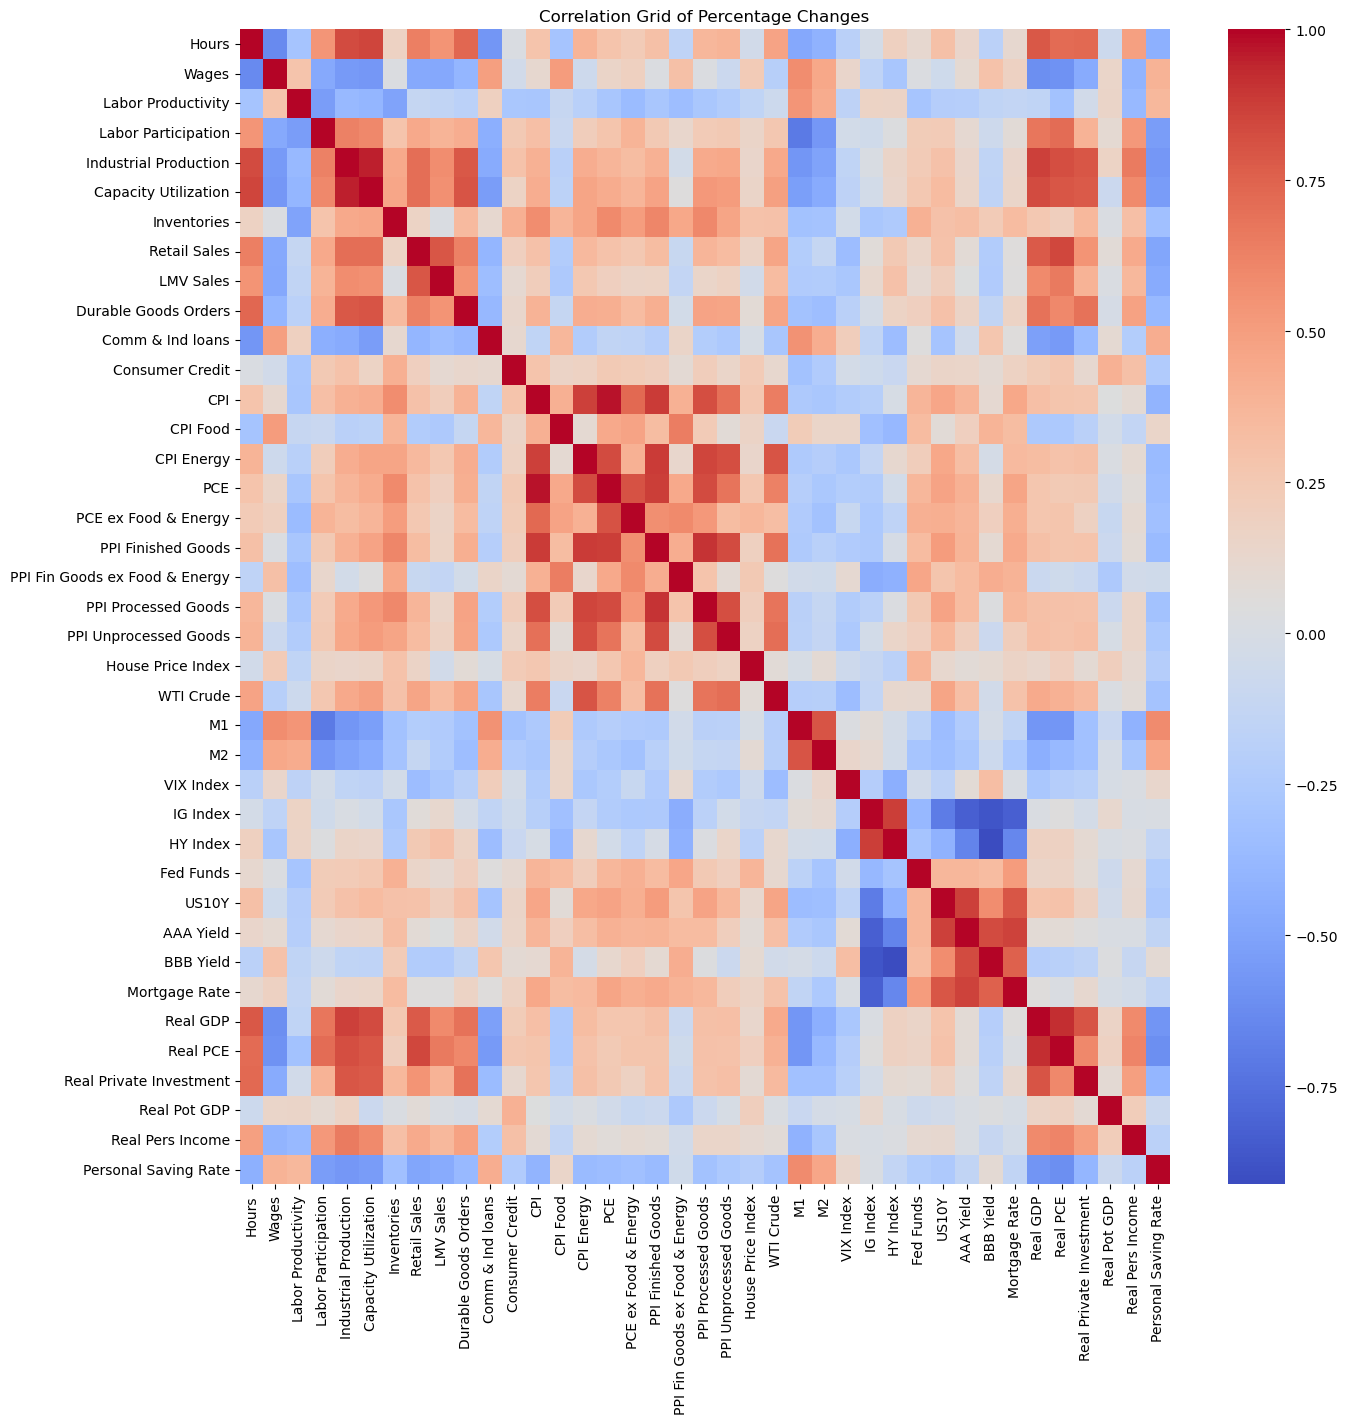

In [45]:
# Compute the correlation matrix
corr_matrix = df_pct_change.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Grid of Percentage Changes')
plt.show()


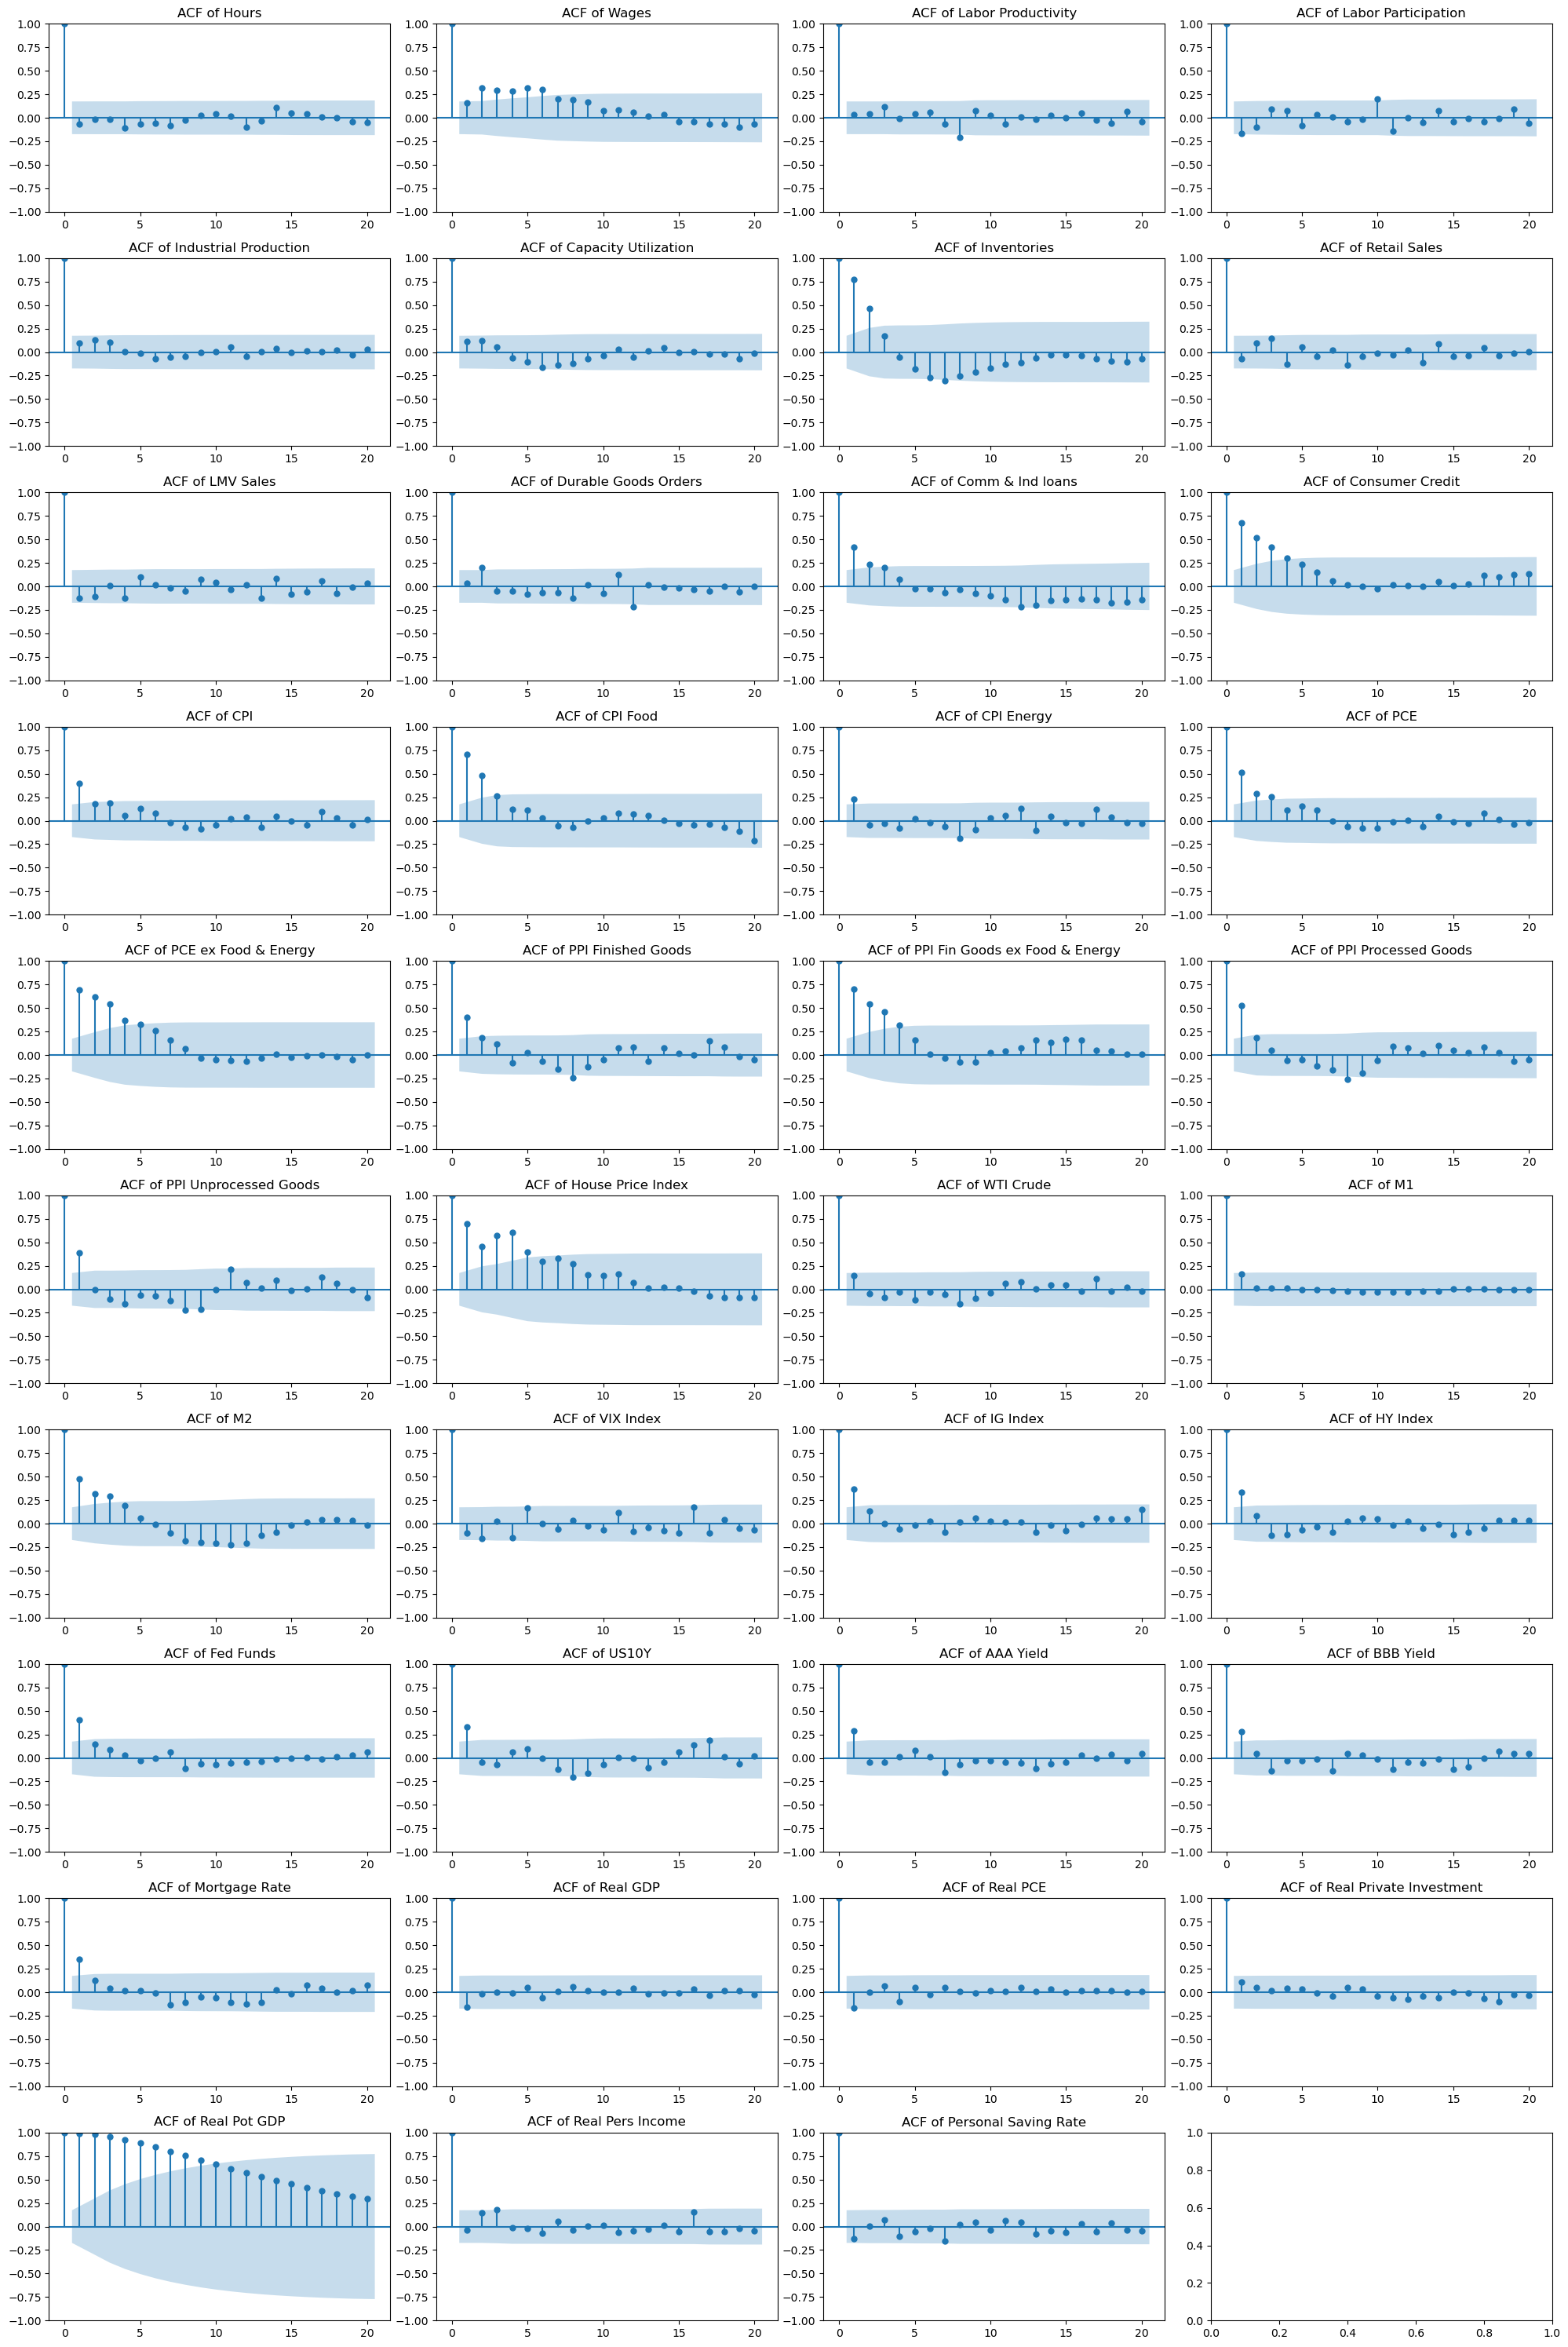

In [46]:
# Plot ACF for each column
fig, axes = plt.subplots(10, 4, figsize=(20, 30))
axes = axes.flatten()
for i, col in enumerate(df_pct_change.columns):
    sm.graphics.tsa.plot_acf(df_pct_change[col], lags=20, ax=axes[i], title=f'ACF of {col}')
plt.tight_layout()
plt.show()

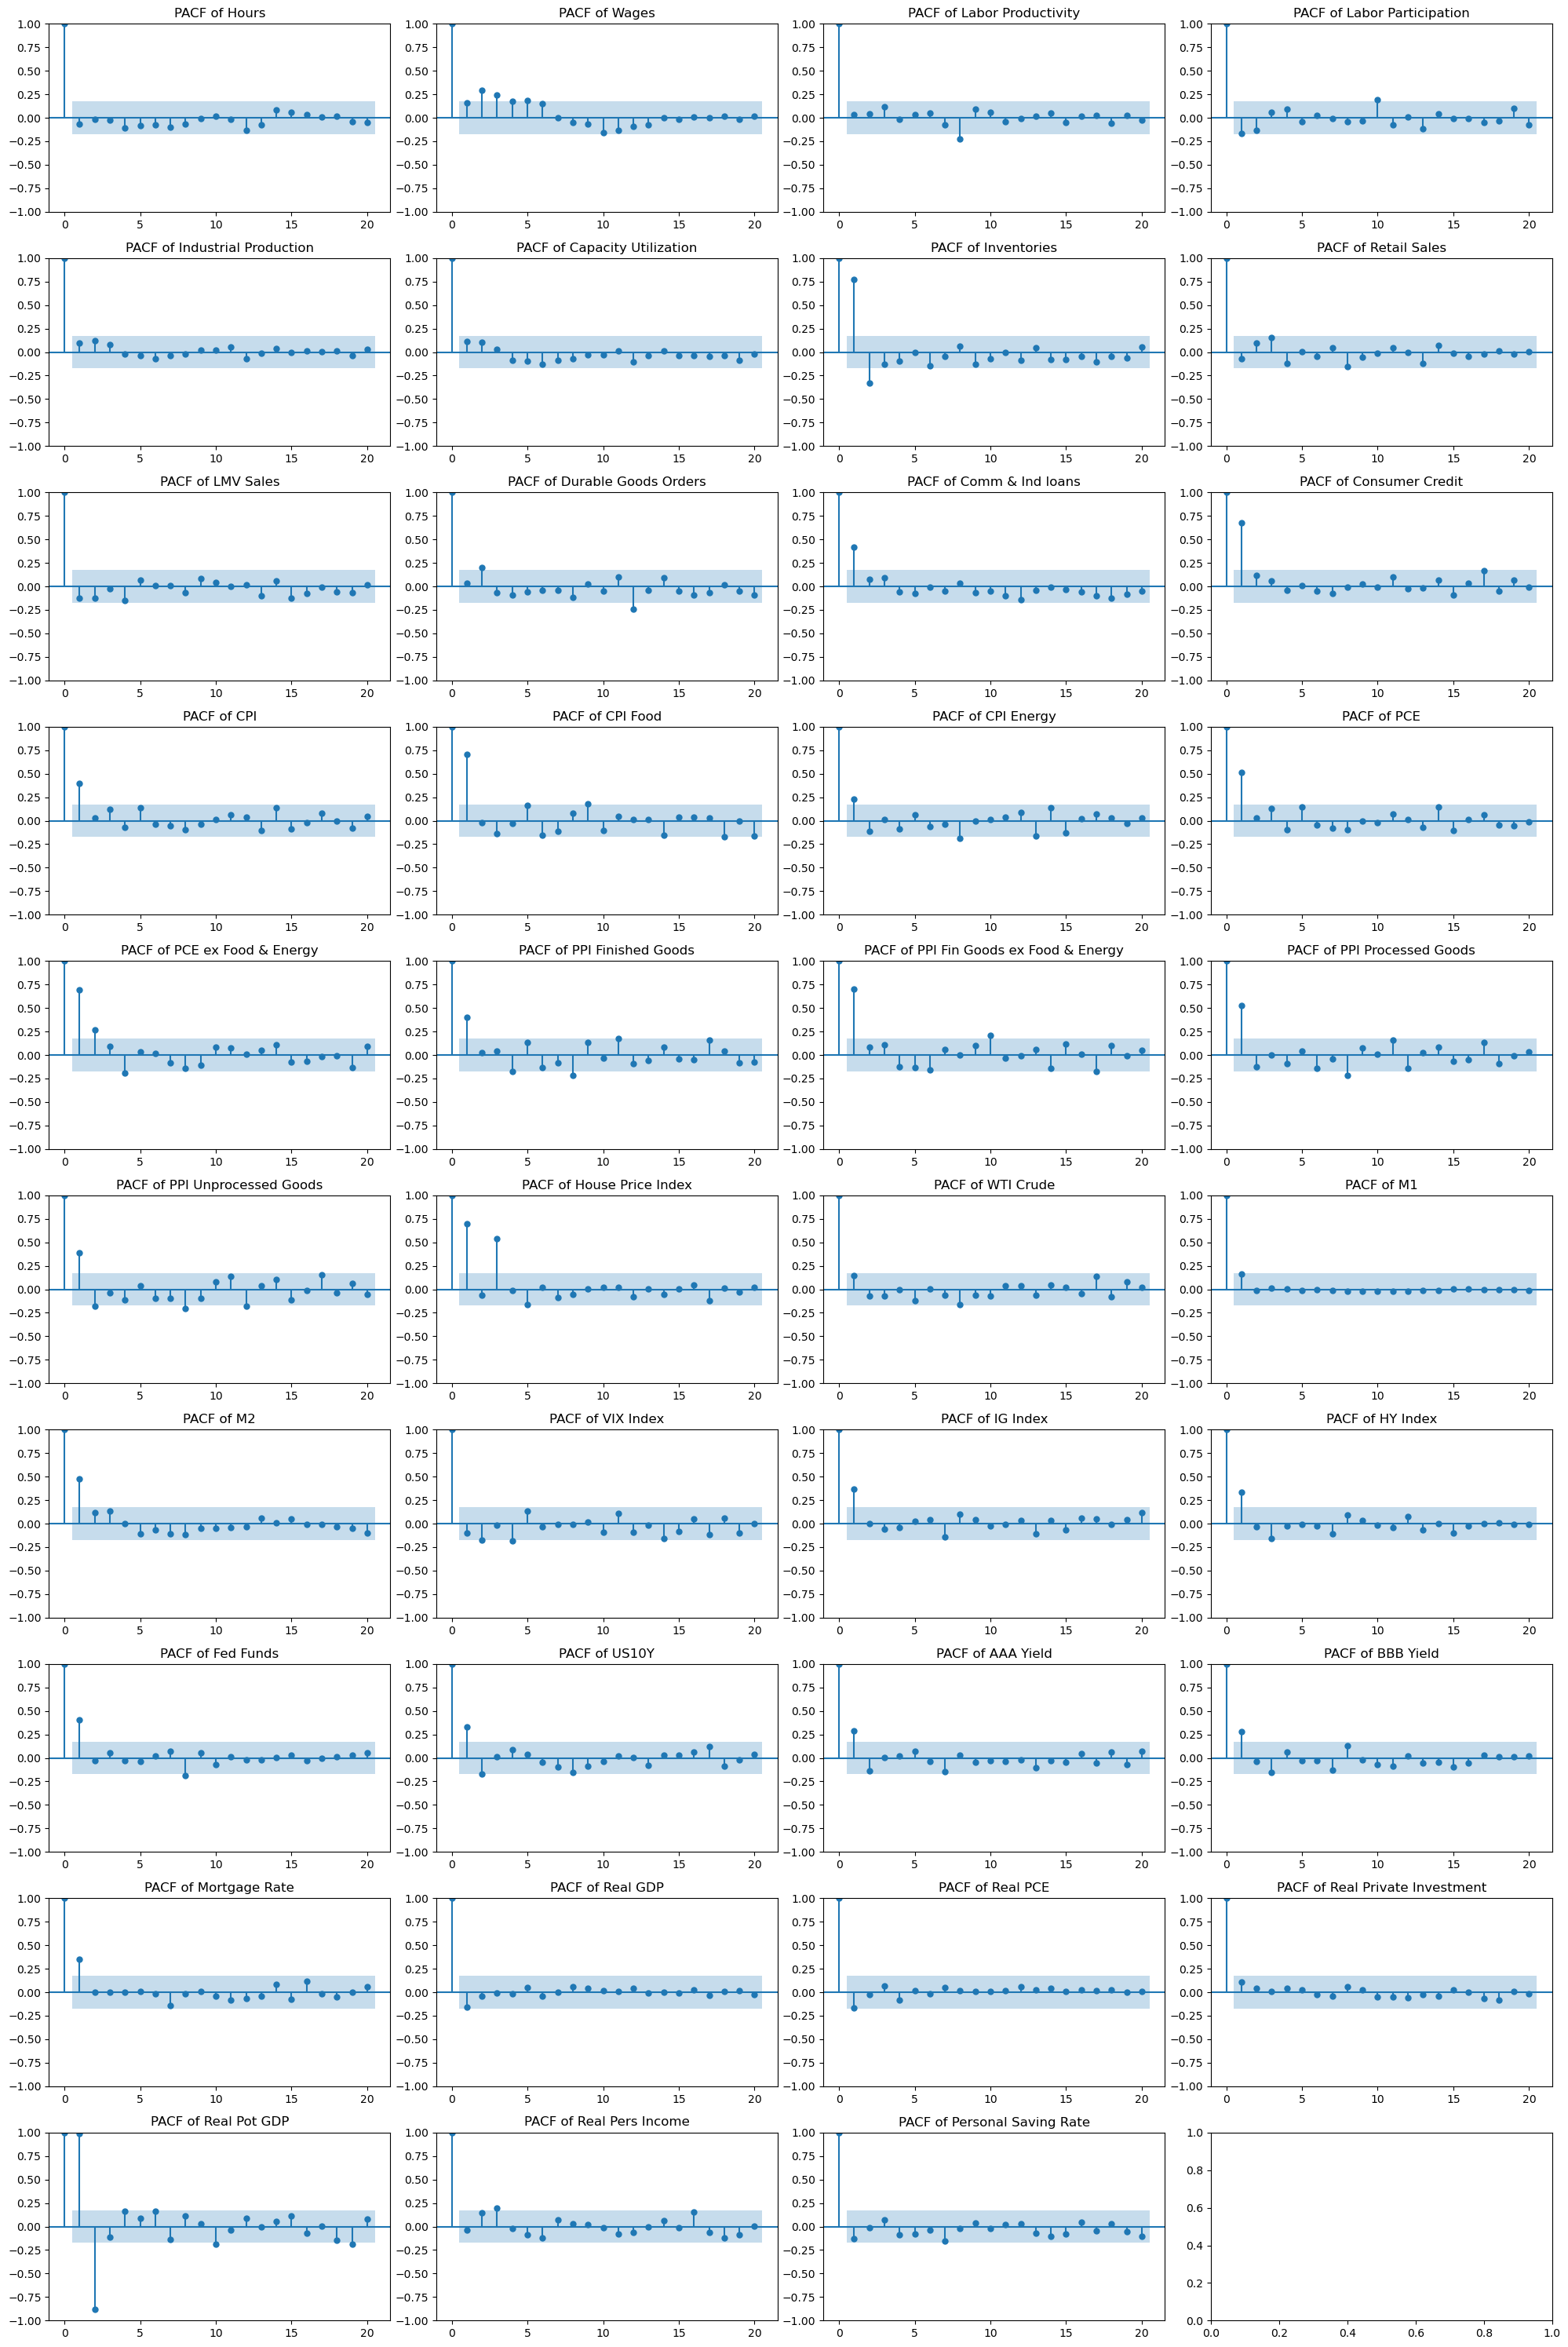

In [47]:
# Plot PACF for each column
fig, axes = plt.subplots(10, 4, figsize=(20, 30))
axes = axes.flatten()
for i, col in enumerate(df_pct_change.columns):
    sm.graphics.tsa.plot_pacf(df_pct_change[col], lags=20, ax=axes[i], title=f'PACF of {col}')
plt.tight_layout()
plt.show()

In [48]:
# Function to find cointegrated pairs in the dataset
from statsmodels.tsa.stattools import adfuller, coint
def find_cointegrated_pairs(df_pct_change):
    n = df_pct_change.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = df_pct_change.columns
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(df_pct_change[keys[i]], df_pct_change[keys[j]])
            score_matrix[i, j] = result[0]
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:  # p-value threshold for cointegration
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

# Perform cointegration analysis
score_matrix, pvalue_matrix, cointegrated_pairs = find_cointegrated_pairs(df_pct_change)

# Display the cointegrated pairs
cointegrated_pairs

[('Hours', 'Wages'),
 ('Hours', 'Labor Productivity'),
 ('Hours', 'Labor Participation'),
 ('Hours', 'Industrial Production'),
 ('Hours', 'Capacity Utilization'),
 ('Hours', 'Inventories'),
 ('Hours', 'Retail Sales'),
 ('Hours', 'LMV Sales'),
 ('Hours', 'Durable Goods Orders'),
 ('Hours', 'Comm & Ind loans'),
 ('Hours', 'Consumer Credit'),
 ('Hours', 'CPI'),
 ('Hours', 'CPI Food'),
 ('Hours', 'CPI Energy'),
 ('Hours', 'PCE'),
 ('Hours', 'PCE ex Food & Energy'),
 ('Hours', 'PPI Finished Goods'),
 ('Hours', 'PPI Fin Goods ex Food & Energy'),
 ('Hours', 'PPI Processed Goods'),
 ('Hours', 'PPI Unprocessed Goods'),
 ('Hours', 'House Price Index'),
 ('Hours', 'WTI Crude'),
 ('Hours', 'M1'),
 ('Hours', 'M2'),
 ('Hours', 'VIX Index'),
 ('Hours', 'IG Index'),
 ('Hours', 'HY Index'),
 ('Hours', 'Fed Funds'),
 ('Hours', 'US10Y'),
 ('Hours', 'AAA Yield'),
 ('Hours', 'BBB Yield'),
 ('Hours', 'Mortgage Rate'),
 ('Hours', 'Real GDP'),
 ('Hours', 'Real PCE'),
 ('Hours', 'Real Private Investment'),
 ('

Performing regression to predict Real GDP based on primary macroeconomic variables, shortlisted based on my experience with macroeconomic features:
STEP 1: Sequential feature selection


In [49]:
#gdp_linreg_X = df_pct_change[['Wages', 'Industrial Production', 'Capacity Utilization',
#       'Retail Sales', 'LMV Sales','Comm & Ind loans',
#       'Consumer Credit', 'CPI', 'PPI Fin Goods ex Food & Energy', 'House Price Index','US10Y', 'Real Private Investment', 'Real Pers Income']]

#df_linreg_X = pd.DataFrame(df_linreg_X)

gdp_linreg_X = df_pct_change[['Industrial Production', 'Capacity Utilization',
       'Retail Sales', 'Consumer Credit', 'CPI', 'PPI Fin Goods ex Food & Energy', 'House Price Index','US10Y', 'Real Private Investment', 'Real Pers Income']]

gdp_linreg_X.index = df_pct_change.index
gdp_linreg_y = df_pct_change[['Real GDP']]
X_train, X_test, y_train, y_test = train_test_split(gdp_linreg_X, gdp_linreg_y, test_size = 0.3, random_state = 42)

In [50]:
sequential_pipe = ''
sequential_train_mse = ''
sequential_test_mse = ''

sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))

print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

1.1206586455951014e-05
1.102083666323212e-05


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [51]:
seq_coefs = sequential_pipe.named_steps['linreg'].coef_
print(type(seq_coefs))
print(seq_coefs)
sequential_pipe

<class 'numpy.ndarray'>
[[ 0.02878617  0.19774776  0.09593713  4.38329174 -0.89782642  1.71498071]]


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [52]:
feature_names = sequential_pipe.named_steps['poly_features'].get_feature_names_out()

In [53]:
gdp_linreg_X2 = df_pct_change[['Wages', 'Industrial Production', 'Capacity Utilization',
      'Retail Sales', 'LMV Sales','Comm & Ind loans',
       'Consumer Credit', 'CPI', 'PPI Fin Goods ex Food & Energy', 'House Price Index','US10Y', 'Real Private Investment', 'Real Pers Income']]

gdp_linreg_X2 = pd.DataFrame(gdp_linreg_X2)

In [54]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(gdp_linreg_X2, gdp_linreg_y, test_size = 0.3, random_state = 42)

In [55]:
gdp_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
gdp_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

Performing regression to predict Real GDP based on primary macroeconomic variables, shortlisted based on my experience with macroeconomic features:
STEP 2: Using GridSearchCV to perform hyper parameter optimal selection

In [56]:
param_dict = {}
gdp_grid = ''
gdp_train_mse = ''
gdp_test_mse = ''

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5, 6, 7]}
gdp_grid = GridSearchCV(gdp_pipe, param_grid=param_dict)
gdp_grid.fit(X_train2, y_train2)
train_preds = gdp_grid.predict(X_train2)
test_preds = gdp_grid.predict(X_test2)
gdp_train_mse = mean_squared_error(y_train2, train_preds)
gdp_test_mse = mean_squared_error(y_test2, test_preds)

print(f'Train MSE: {gdp_train_mse}')
print(f'Test MSE: {gdp_test_mse}')

Train MSE: 2.291597593573626e-05
Test MSE: 1.7736960588580864e-05


In [57]:
best_estimator = ''
best_selector = ''
best_model = ''
feature_names = ''
coefs = ''


best_estimator = gdp_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = gdp_grid.best_estimator_.named_steps['model']
feature_names = X_train2.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
#report = pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])
coefs.T, feature_names

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('model', LinearRegression())])
Features from best selector: Index(['Industrial Production', 'Retail Sales', 'Real Private Investment'], dtype='object').
Coefficient values: 


(array([[0.327563  ],
        [0.17251996],
        [0.08136367]]),
 Index(['Industrial Production', 'Retail Sales', 'Real Private Investment'], dtype='object'))

Performing regression to predict mortgage rates based on primary macroeconomic and market variables, shortlisted based on my experience with macroeconomic features.
STEP 1: SEQUENTIAL FEATURE SELECTION

In [58]:
mktdata = df_pct_change[['Wages', 'Industrial Production', 'Capacity Utilization', 
       'Retail Sales', 'Consumer Credit', 'CPI','House Price Index', 'Fed Funds', 'US10Y', 'AAA Yield',
       'BBB Yield', 'Real GDP','Real Pers Income',
       'Personal Saving Rate']]

In [59]:
mktdata.index = df_pct_change.index
mtge = df_pct_change[['Mortgage Rate']]
mtge.index = df_pct_change.index

In [60]:
X_train, X_test, y_train, y_test = train_test_split(mktdata, mtge, test_size = 0.3, random_state = 42)

In [61]:
sequential_pipe = ''
sequential_train_mse = ''
sequential_test_mse = ''

sequential_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 2, include_bias = False)),
                           ('selector', SequentialFeatureSelector(LinearRegression(), 
                                                                  n_features_to_select=6)),
                           ('linreg', LinearRegression())])
sequential_pipe.fit(X_train, y_train)
sequential_train_mse = mean_squared_error(y_train, sequential_pipe.predict(X_train))
sequential_test_mse = mean_squared_error(y_test, sequential_pipe.predict(X_test))

print(sequential_train_mse)
print(sequential_test_mse)
sequential_pipe

0.0007635876220331294
0.0011725704210298078


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

In [62]:
seq_coefs = sequential_pipe.named_steps['linreg'].coef_
print(type(seq_coefs))
print(seq_coefs)
sequential_pipe

<class 'numpy.ndarray'>
[[  0.64187065   9.16479797  57.91350981  20.63737788  -5.08666769
  -31.16239842]]


Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=6)),
                ('linreg', LinearRegression())])

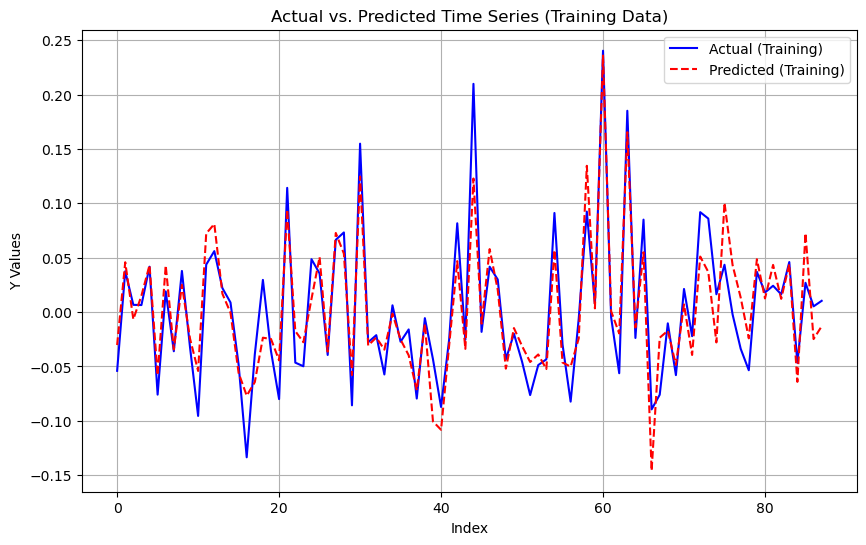

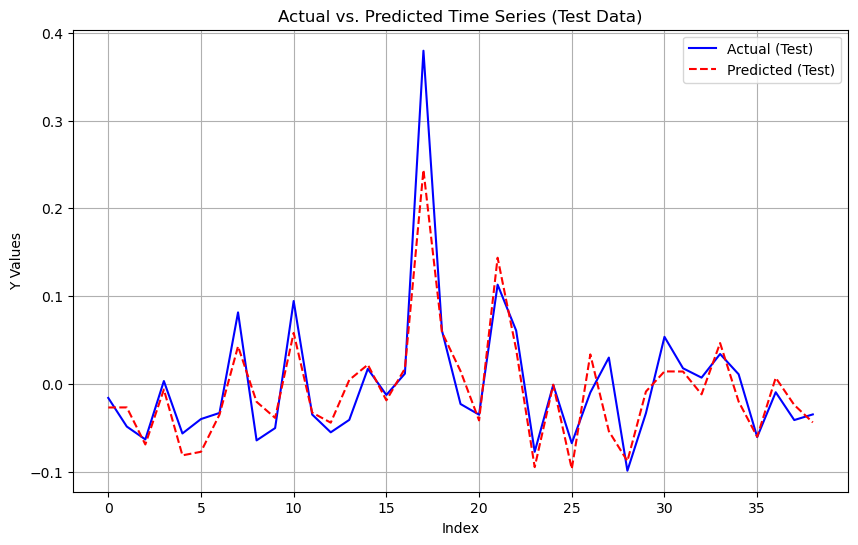

In [63]:
sequential_pipe.fit(X_train, y_train)
train_preds = sequential_pipe.predict(X_train)
test_preds = sequential_pipe.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

train_indices = np.arange(len(y_train))
test_indices = np.arange(len(y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_indices, y_train, label='Actual (Training)', color='blue')
plt.plot(train_indices, train_preds, label='Predicted (Training)', color='red', linestyle='--')
plt.title('Actual vs. Predicted Time Series (Training Data)')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(test_indices, y_test, label='Actual (Test)', color='blue')
plt.plot(test_indices, test_preds, label='Predicted (Test)', color='red', linestyle='--')
plt.title('Actual vs. Predicted Time Series (Test Data)')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.legend()
plt.grid(True)
plt.show()


In [64]:
mtg_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
mtg_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

Performing regression to predict mortgage rates based on primary macroeconomic and market variables, shortlisted based on my experience with macroeconomic features.
STEP 2: USING GRIDSEARCHCV

In [65]:
param_dict = {}
mtg_grid = ''
mtg_train_mse = ''
mtg_test_mse = ''

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5, 6, 7]}
mtg_grid = GridSearchCV(mtg_pipe, param_grid=param_dict)
mtg_grid.fit(X_train, y_train)
train_preds = mtg_grid.predict(X_train)
test_preds = mtg_grid.predict(X_test)
mtg_train_mse = mean_squared_error(y_train, train_preds)
mtg_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {gdp_train_mse}')
print(f'Test MSE: {gdp_test_mse}')

Train MSE: 2.291597593573626e-05
Test MSE: 1.7736960588580864e-05


In [66]:
best_estimator = ''
best_selector = ''
best_model = ''
feature_names = ''
coefs = ''


best_estimator = mtg_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = mtg_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
#report = pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])
coefs.T, feature_names

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=4)),
                ('model', LinearRegression())])
Features from best selector: Index(['Wages', 'Industrial Production', 'Consumer Credit', 'AAA Yield'], dtype='object').
Coefficient values: 


(array([[2.57560429],
        [0.38326235],
        [0.37758816],
        [0.84793357]]),
 Index(['Wages', 'Industrial Production', 'Consumer Credit', 'AAA Yield'], dtype='object'))

Performing regression to predict mortgage rates based on primary macroeconomic and market variables, shortlisted based on my experience with macroeconomic features.
STEP 3: USING GRIDSEARCH CV ON RIDGE REGRESSION (L2 REGULARIZATION)

In [67]:
pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 25.0, 50.0, 60, 70, 75.0, 77.5, 80, 82.5, 85, 90, 95, 100.0, 200.0, 300.0, 400.0, 500.0, 1000.0]}

grid_2 = ''
model_2_train_mse = ''
model_2_test_mse = ''
model_2_best_alpha = ''

grid_2 = GridSearchCV(pipe, param_grid=param_dict)
grid_2.fit(X_train, y_train)
train_preds = grid_2.predict(X_train)
test_preds = grid_2.predict(X_test)
model_2_train_mse = mean_squared_error(y_train, train_preds)
model_2_test_mse = mean_squared_error(y_test, test_preds)
model_2_best_alpha = grid_2.best_params_

print(f'Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')

Test MSE: 0.0011046299936309308
Best Alpha: 77.5


In [68]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 25.0, 50.0, 60, 70, 75.0, 77.5, 80, 82.5, 85, 90, 95, 100.0, 200.0, 300.0, 400.0, 500.0, 1000.0]}

grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Best Alpha: {best_model.named_steps["ridge"].alpha}')

poly = best_model.named_steps['poly']
ridge = best_model.named_steps['ridge']

feature_names = X_train.columns

selected_features = [feature_names[i] for i, coef in enumerate(ridge.coef_) if np.any(abs(coef) > 0)]
selected_coefficients = [coef for coef in ridge.coef_ if np.any(abs(coef) > 0)]

for feature, coefficient in zip(selected_features, selected_coefficients):
    print(f'{feature}: {coefficient}')


Train MSE: 0.0014373110823782522
Test MSE: 0.003253463720073252
Best Alpha: 300.0
Wages: [ 0.00000000e+00  4.24501476e-04  8.56831164e-04  7.41873412e-04
 -2.40558996e-04  1.26028230e-03  1.81813812e-03 -1.22629276e-03
  1.18519439e-03  6.82073234e-03  7.15632295e-03  6.88304755e-03
  5.87387433e-04 -3.02325092e-06 -1.00065610e-04  6.44383470e-04
 -3.21681410e-04 -2.05365701e-04 -4.72926212e-04 -1.22289249e-03
  8.60331418e-04 -1.18478615e-04  3.65389311e-04 -6.03213064e-04
  1.02555524e-04  1.33810574e-04 -2.58318944e-04 -6.41011616e-04
 -5.04455542e-04 -5.18220380e-04 -6.97234825e-04  5.26070676e-05
  5.01691814e-04 -8.87752478e-04  4.65892121e-04 -9.07145640e-04
 -6.35887343e-05 -6.36583934e-06  2.53140727e-04 -4.25896235e-05
 -5.31348909e-04  7.96540966e-05 -9.30517644e-04 -1.01766092e-05
  4.94687467e-04 -7.86048318e-04  4.07750422e-04 -8.76756400e-04
  4.18393081e-05 -9.96976603e-05  1.20876272e-04 -2.59955682e-04
 -4.94858308e-04  7.00633801e-05 -3.10465376e-04  5.41681350e-04
 

Selected Features and Coefficients:
Wages: 0.004036254674060056
Fed Funds: 0.005626506045887907
CPI: 0.007115007609586076
BBB Yield: 0.015711354183238657
AAA Yield: 0.01573146305875585
US10Y: 0.016970978518043706
Train MSE: 0.0009536734536646946
Test MSE: 0.0009762995053115703
Best Alpha: 50.0


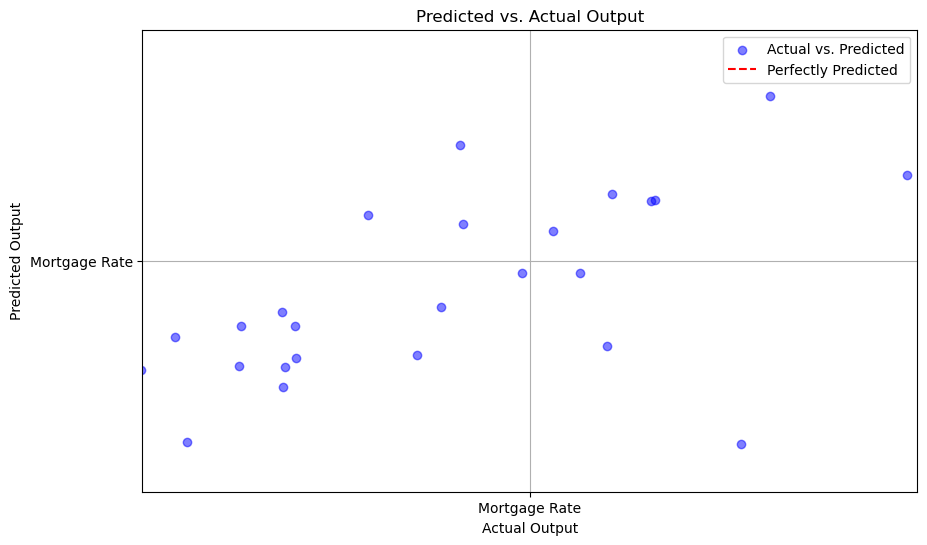

In [69]:
pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])

param_grid = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 25.0, 50.0, 60, 70, 75.0, 77.5, 80, 82.5, 85, 90, 95, 100.0, 200.0, 300.0, 400.0, 500.0, 1000.0]}

grid_search = GridSearchCV(pipe, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

ridge = best_model.named_steps['ridge']

selected_features = np.array(X_train.columns)  
selected_coefficients = ridge.coef_.reshape(-1) 

top_indices = np.argsort(np.abs(selected_coefficients))[-6:]


selected_features = selected_features[top_indices]
selected_coefficients = selected_coefficients[top_indices]

print("Selected Features and Coefficients:")
for feature, coefficient in zip(selected_features, selected_coefficients):
    print(f'{feature}: {coefficient}')

train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Best Alpha: {best_model.named_steps["ridge"].alpha}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfectly Predicted')
plt.title('Predicted vs. Actual Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.legend()
plt.grid(True)
plt.show()


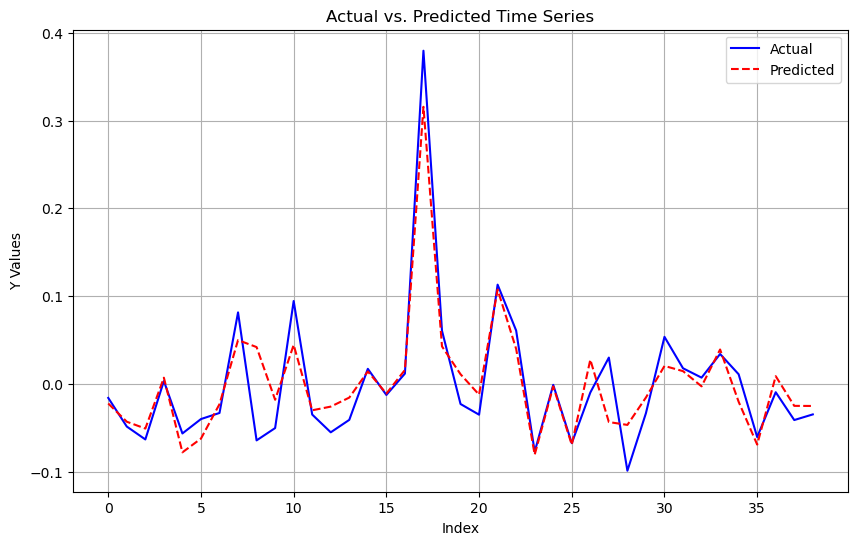

In [70]:
indices = np.arange(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual', color='blue')
plt.plot(indices, test_preds, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted Time Series')
plt.xlabel('Index')
plt.ylabel('Y Values')
plt.legend()
plt.grid(True)
plt.show()

THE NEXT STEP OF THE EXERCISE INVOLVES WORKING WITH ORDINAL DATA.
The original % changes Q-o-Q time series have been reclassified into ordered ordinal data:
Lo: Low values
Med: Medium values
Hi: High values
These classes are determined based on my experience with macroeconomic data and represent for example, negative inflation = 'Low', inflation of 0-2% per year = Medium and inflation above 2% per year = High.

In [71]:
# Define the ordinal encoding mapping
ordinal_mapping = {'Lo': 1, 'Med': 2, 'Hi': 3}

# Apply ordinal encoding to the dataset, excluding 'Date' and 'Recession' columns
encoded_data = data.drop(['Date', 'Recession'], axis=1).replace(ordinal_mapping)

# Prepare features (X) and target variable (y)
X = encoded_data
y = data['Recession']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


STEP 1: Perform logistic regression and use gridsearchcv for hyperparameter optimal selection

In [72]:
logreg_parameters = {
    'penalty': ['l2'],
    'C': np.logspace(-3, 3, 7),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

grid_search_logreg = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=logreg_parameters,
                                  scoring='accuracy',
                                  cv=10)

gs_logreg = grid_search_logreg.fit(X_train, y_train)
gs_logreg_pred = gs_logreg.predict(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/s

In [73]:
print('\n Logistic Regression - Grid Search best score -')
print(gs_logreg.best_score_)

print('\nGrid Search best parameters -')
print(gs_logreg.best_params_)

print('\Grid Search Results -')
print(gs_logreg.cv_results_)

print("Best parameters:")
print(gs_logreg.best_estimator_)

logreg_iter2 = gs_logreg.best_estimator_
print('Test accuracy: %.3f' % logreg_iter2.score(X_test, y_test))

print("Best cross-validation score:", gs_logreg.best_score_)

score = gs_logreg.score(X_test, y_test)
print("Test Score :", score)


 Logistic Regression - Grid Search best score -
0.913888888888889

Grid Search best parameters -
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
\Grid Search Results -
{'mean_fit_time': array([0.00793874, 0.00531616, 0.00150373, 0.00502939, 0.00218773,
       0.00151505, 0.00301626, 0.00136318, 0.0031698 , 0.00495729,
       0.00536249, 0.00190308, 0.00819058, 0.00792136, 0.00090182,
       0.00861144, 0.00741332, 0.0015959 , 0.01143148, 0.01114926,
       0.00104678]), 'std_fit_time': array([0.00232876, 0.00477062, 0.00418272, 0.00438837, 0.00332401,
       0.00433713, 0.00511122, 0.00272875, 0.00397581, 0.00757716,
       0.00566516, 0.0038127 , 0.00711486, 0.00438453, 0.00270545,
       0.00746072, 0.0060164 , 0.00418055, 0.00599436, 0.0062433 ,
       0.00283601]), 'mean_score_time': array([0.00032043, 0.00045035, 0.0007653 , 0.00073385, 0.00240767,
       0.00155463, 0.00159392, 0.00332925, 0.00086751, 0.00137067,
       0.00151041, 0.00136244, 0.00011196, 0.00085366, 0.001732

In [74]:

logreg_train_accuracy = gs_logreg.score(X_train, y_train)
logreg_test_accuracy = accuracy_score(y_test, gs_logreg_pred)
logreg_precision = precision_score(y_test, gs_logreg_pred, average='macro')
logreg_recall = recall_score(y_test, gs_logreg_pred, average='macro')
logreg_f1 = f1_score(y_test, gs_logreg_pred, average='macro')

print("Train Accuracy: {:.6f}".format(logreg_train_accuracy))
print("Test Accuracy: {:.6f}".format(logreg_test_accuracy))
print("Precision: {:.6f}".format(logreg_precision))
print("Recall: {:.6f}".format(logreg_recall))
print("F1-score: {:.6f}".format(logreg_f1))

Train Accuracy: 0.951220
Test Accuracy: 0.911111
Precision: 0.797619
Recall: 0.687500
F1-score: 0.725610


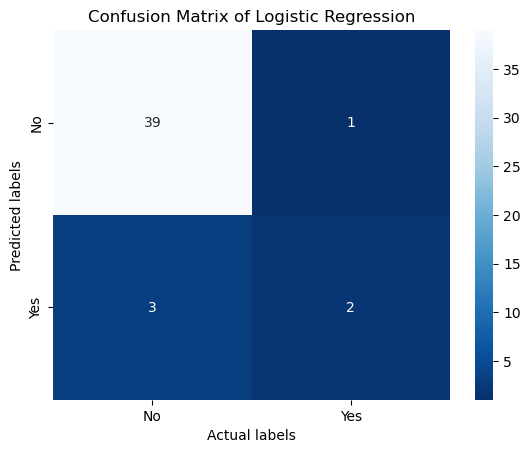

In [75]:
ax= plt.subplot()
logreg_conf_matrix = confusion_matrix(y_test, gs_logreg_pred)
sns.heatmap(logreg_conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of Logistic Regression'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

plt.show()

STEP 2: Perform k nearest neighbor classification and use gridsearchcv for hyperparameter optimal selection

In [76]:
# Define the parameter grid for KNN
knn_parameters = {
    'n_neighbors': np.arange(1, 31),  # Search between 1 and 30 neighbors
    'weights': ['uniform', 'distance'],  # Weighting function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# Initialize Grid Search CV for KNN
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=knn_parameters,
                               scoring='accuracy',
                               cv=10)

# Fit the Grid Search CV on the training data
gs_knn = grid_search_knn.fit(X_train, y_train)

# Make predictions on the test data
gs_knn_pred = gs_knn.predict(X_test)

# If you want to check the best parameters found by Grid Search
best_params_knn = gs_knn.best_params_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [77]:
print('\n KNN Classifier - Grid Search best score -')
print(gs_knn.best_score_)

print('\nGrid Search best parameters -')
print(gs_knn.best_params_)

print('\Grid Search Results -')
print(gs_knn.cv_results_)

print("Best parameters:")
print(gs_knn.best_estimator_)

knn_iter2 = gs_knn.best_estimator_
print('Test accuracy: %.3f' % knn_iter2.score(X_test, y_test))

print("Best cross-validation score:", gs_knn.best_score_)

score = gs_knn.score(X_test, y_test)
print("Test Score :", score)


 KNN Classifier - Grid Search best score -
0.9375

Grid Search best parameters -
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
\Grid Search Results -
{'mean_fit_time': array([8.02278519e-04, 2.38895416e-03, 1.40318871e-03, 1.56414509e-03,
       2.17795372e-04, 1.55928135e-03, 1.56598091e-03, 0.00000000e+00,
       1.15888119e-03, 1.56342983e-03, 1.56457424e-03, 3.13472748e-03,
       0.00000000e+00, 3.13434601e-03, 1.56259537e-03, 1.56300068e-03,
       1.60982609e-03, 7.39574432e-05, 1.56483650e-03, 1.59037113e-03,
       1.56464577e-03, 0.00000000e+00, 1.64673328e-03, 0.00000000e+00,
       3.12538147e-03, 0.00000000e+00, 1.50167942e-03, 1.56395435e-03,
       0.00000000e+00, 1.56254768e-03, 0.00000000e+00, 3.12192440e-03,
       0.00000000e+00, 3.08110714e-03, 4.69877720e-03, 3.48522663e-03,
       1.56471729e-03, 1.56238079e-03, 1.57551765e-03, 5.12351990e-03,
       4.31623459e-03, 3.12333107e-03, 0.00000000e+00, 1.56245232e-03,
       3.12633514e-03, 0.0000000

In [78]:

knn_train_accuracy = gs_knn.score(X_train, y_train)
knn_test_accuracy = accuracy_score(y_test, gs_knn_pred)
knn_precision = precision_score(y_test, gs_knn_pred, average='macro')
knn_recall = recall_score(y_test, gs_knn_pred, average='macro')
knn_f1 = f1_score(y_test, gs_knn_pred, average='macro')

print("Train Accuracy: {:.6f}".format(knn_train_accuracy))
print("Test Accuracy: {:.6f}".format(knn_test_accuracy))
print("Precision: {:.6f}".format(knn_precision))
print("Recall: {:.6f}".format(knn_recall))
print("F1-score: {:.6f}".format(knn_f1))

Train Accuracy: 1.000000
Test Accuracy: 0.911111
Precision: 0.772556
Recall: 0.862500
F1-score: 0.807692


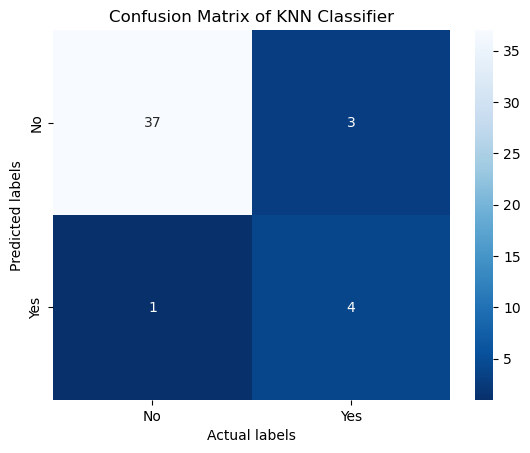

In [79]:
ax= plt.subplot()
knn_conf_matrix = confusion_matrix(y_test, gs_knn_pred)
sns.heatmap(knn_conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of KNN Classifier'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

plt.show()

STEP 3: Perform decision tree classification and use gridsearchcv for hyperparameter optimal selection

In [80]:
# Define the parameter grid for the Decision Tree
dt_parameters = {
    'max_depth': [3, 4, 5],  # Limiting tree depth to 3-5 levels
    'min_samples_split': [2, 4, 6, 8, 10],  # Fewer splits to speed up the process
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]  # Fewer samples per leaf to prevent very deep trees
}

# Initialize Grid Search CV for Decision Tree
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(),
                              param_grid=dt_parameters,
                              scoring='accuracy',
                              cv=10)

# Fit the Grid Search CV on the training data
gs_dt = grid_search_dt.fit(X_train, y_train)

# Make predictions on the test data
gs_dt_pred = gs_dt.predict(X_test)

# To get the best parameters found by Grid Search
best_params_dt = gs_dt.best_params_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [81]:
print('\n Decision Tree - Grid Search best score -')
print(gs_dt.best_score_)

print('\nGrid Search best parameters -')
print(gs_dt.best_params_)

print('\Grid Search Results -')
print(gs_dt.cv_results_)

print("Best parameters:")
print(gs_dt.best_estimator_)

dt_iter2 = gs_dt.best_estimator_
print('Test accuracy: %.3f' % dt_iter2.score(X_test, y_test))

print("Best cross-validation score:", gs_dt.best_score_)

score = gs_dt.score(X_test, y_test)
print("Test Score :", score)


 Decision Tree - Grid Search best score -
0.9152777777777779

Grid Search best parameters -
{'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
\Grid Search Results -
{'mean_fit_time': array([5.68094254e-03, 5.91197014e-03, 0.00000000e+00, 1.56247616e-03,
       1.59041882e-03, 1.56481266e-03, 4.41718102e-03, 3.12428474e-03,
       3.12423706e-03, 1.56238079e-03, 0.00000000e+00, 1.58047676e-04,
       3.90636921e-03, 0.00000000e+00, 1.50165558e-03, 1.56230927e-03,
       1.56176090e-03, 0.00000000e+00, 0.00000000e+00, 3.12390327e-03,
       1.56285763e-03, 1.56209469e-03, 5.46455383e-05, 1.56459808e-03,
       0.00000000e+00, 1.56257153e-03, 7.37428665e-05, 5.50007820e-04,
       0.00000000e+00, 3.12652588e-03, 1.56307220e-03, 3.12540531e-03,
       1.56204700e-03, 3.12583447e-03, 3.12561989e-03, 1.56216621e-03,
       1.60129070e-03, 3.38482857e-04, 3.12936306e-03, 1.56230927e-03,
       3.71968746e-03, 2.02567577e-03, 1.57244205e-03, 0.00000000e+00,
       1.64299011e-03

In [82]:
dt_train_accuracy = gs_dt.score(X_train, y_train)
dt_test_accuracy = accuracy_score(y_test, gs_dt_pred)
dt_precision = precision_score(y_test, gs_dt_pred, average='macro')
dt_recall = recall_score(y_test, gs_dt_pred, average='macro')
dt_f1 = f1_score(y_test, gs_dt_pred, average='macro')

print("Train Accuracy: {:.6f}".format(dt_train_accuracy))
print("Test Accuracy: {:.6f}".format(dt_test_accuracy))
print("Precision: {:.6f}".format(dt_precision))
print("Recall: {:.6f}".format(dt_recall))
print("F1-score: {:.6f}".format(dt_f1))

Train Accuracy: 0.939024
Test Accuracy: 0.866667
Precision: 0.687970
Recall: 0.750000
F1-score: 0.711538


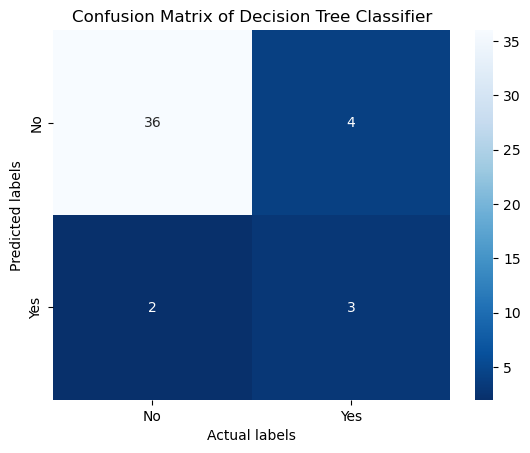

In [83]:
ax= plt.subplot()
dt_conf_matrix = confusion_matrix(y_test, gs_dt_pred)
sns.heatmap(dt_conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of Decision Tree Classifier'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

plt.show()

STEP 4: Perform support vector machine classification and use gridsearchcv for hyperparameter optimal selection

In [84]:
# Define the parameter grid for the SVM
svm_parameters = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Initialize Grid Search CV for SVM
grid_search_svm = GridSearchCV(estimator=SVC(),
                               param_grid=svm_parameters,
                               scoring='accuracy',
                               cv=10)

# Fit the Grid Search CV on the training data
gs_svm = grid_search_svm.fit(X_train, y_train)

# Make predictions on the test data
gs_svm_pred = gs_svm.predict(X_test)

# To get the best parameters found by Grid Search
best_params_svm = gs_svm.best_params_


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [85]:
print('\n SVM - Grid Search best score -')
print(gs_svm.best_score_)

print('\nGrid Search best parameters -')
print(gs_svm.best_params_)

print('\Grid Search Results -')
print(gs_svm.cv_results_)

print("Best parameters:")
print(gs_svm.best_estimator_)

svm_iter2 = gs_svm.best_estimator_
print('Test accuracy: %.3f' % svm_iter2.score(X_test, y_test))

print("Best cross-validation score:", gs_svm.best_score_)

score = gs_svm.score(X_test, y_test)
print("Test Score :", score)


 SVM - Grid Search best score -
0.913888888888889

Grid Search best parameters -
{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
\Grid Search Results -
{'mean_fit_time': array([0.00377135, 0.00225081, 0.00156288, 0.00196962, 0.00313542,
       0.00155354, 0.00251675, 0.00195835, 0.00471113, 0.00156243,
       0.00311646, 0.00157173, 0.        , 0.00312529, 0.00311642,
       0.        , 0.00157394, 0.00407927, 0.00286543, 0.0015729 ,
       0.00032299, 0.00313647, 0.00311639, 0.        , 0.00156271,
       0.00332296, 0.00312529, 0.00157123, 0.00467927, 0.00156224,
       0.        , 0.00156183, 0.0062516 , 0.00312591, 0.00192466,
       0.        , 0.003123  , 0.00156868, 0.00157111, 0.00156364,
       0.00189693, 0.        , 0.00256512, 0.00313668, 0.00155311,
       0.00156288, 0.00155332, 0.00156329, 0.00625086, 0.00201752,
       0.002563  , 0.00311542, 0.00932846, 0.00313513, 0.        ,
       0.00312419]), 'std_fit_time': array([0.00475024, 0.00354038, 0.00468864, 0.00473024, 0.

In [86]:
svm_train_accuracy = gs_svm.score(X_train, y_train)
svm_test_accuracy = accuracy_score(y_test, gs_svm_pred)
svm_precision = precision_score(y_test, gs_svm_pred, average='macro')
svm_recall = recall_score(y_test, gs_svm_pred, average='macro')
svm_f1 = f1_score(y_test, gs_svm_pred, average='macro')

print("Train Accuracy: {:.6f}".format(svm_train_accuracy))
print("Test Accuracy: {:.6f}".format(svm_test_accuracy))
print("Precision: {:.6f}".format(svm_precision))
print("Recall: {:.6f}".format(svm_recall))
print("F1-score: {:.6f}".format(svm_f1))

Train Accuracy: 0.951220
Test Accuracy: 0.888889
Precision: 0.703488
Recall: 0.587500
F1-score: 0.612737


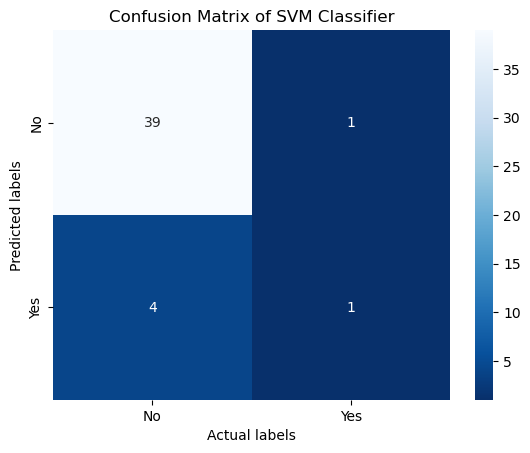

In [87]:
ax= plt.subplot()
svm_conf_matrix = confusion_matrix(y_test, gs_svm_pred)
sns.heatmap(svm_conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of SVM Classifier'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);

Aggregate metrics from all the above 4 classification exercises to evaluate and compare relative performance and trade-offs

In [88]:
#Now we create a dataframe to compare the results of the 4 models. This is immediately one of the objectives of this exercise.
pd.DataFrame({'Model': ['Logistic Regression','K Nearest Neighbors','Decision Tree','Support Vector Machines'], 
             'Train Accuracy': [logreg_train_accuracy,knn_train_accuracy,dt_train_accuracy,svm_train_accuracy],
             'Test Accuracy': [logreg_test_accuracy,knn_test_accuracy,dt_test_accuracy,svm_test_accuracy],
             'Precision': [logreg_precision,knn_precision,dt_precision,svm_precision],
             'Recall': [logreg_recall,knn_recall,dt_recall,svm_recall],
             'F1_Score': [logreg_f1,knn_f1,dt_f1,svm_f1]})

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.951220,0.911111,0.797619,0.6875,0.725610
1,K Nearest Neighbors,1.000000,0.911111,0.772556,0.8625,0.807692
2,Decision Tree,0.939024,0.866667,0.687970,0.7500,0.711538
3,Support Vector Machines,0.951220,0.888889,0.703488,0.5875,0.612737


FINAL STEP: Apply random forest classifier on the above data to find optimal model by decision tree depth and decision tree # in the process of evaluation.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


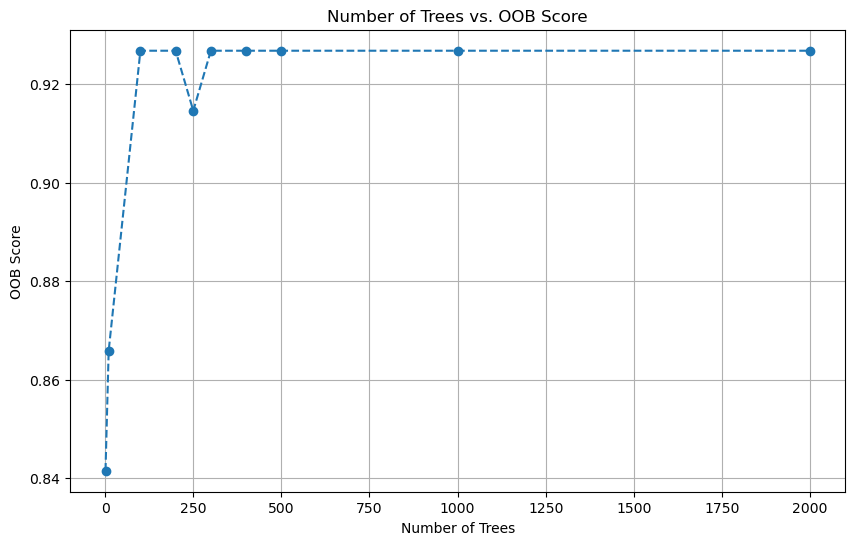

Optimal number of trees: 100


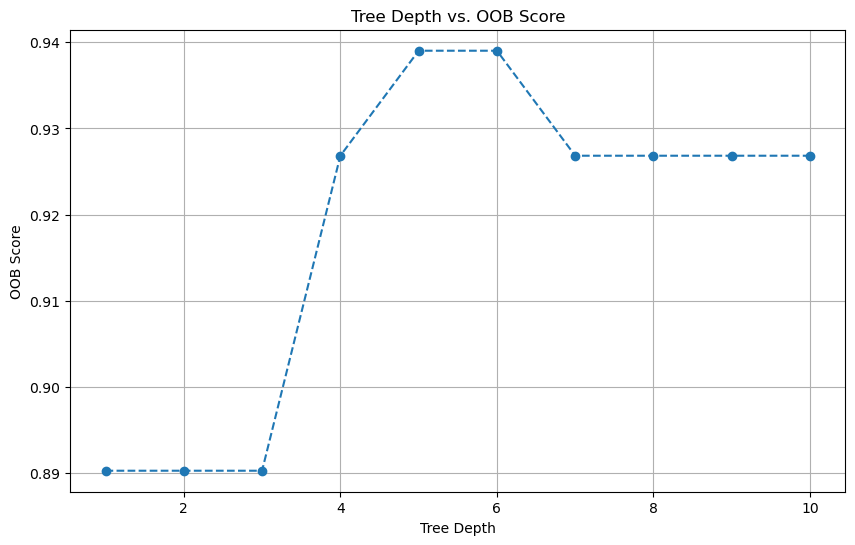

Optimal tree depth: 5
Training Accuracy: 0.9878048780487805
Test Accuracy: 0.9333333333333333
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272
Confusion Matrix:
[[38  2]
 [ 1  4]]


In [90]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Varying number of trees
n_trees = [1, 10, 100, 200, 250, 300, 400, 500, 1000, 2000]
oob_scores = []

for i in n_trees:
    forest = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=i)
    forest.fit(X_train, y_train)
    oob_scores.append(forest.oob_score_)

plt.figure(figsize=(10, 6))
plt.plot(n_trees, oob_scores, '--o')
plt.grid()
plt.title('Number of Trees vs. OOB Score')
plt.xlabel('Number of Trees')
plt.ylabel("OOB Score")
plt.show()

# Recommend the number of trees
optimal_trees = n_trees[oob_scores.index(max(oob_scores))]
print(f"Optimal number of trees: {optimal_trees}")

# Varying tree depth
depths = [1, 2, 3, 4, 5, 6, 7, 8 , 9, 10]
depth_oobs = []

for d in depths:
    forest = RandomForestClassifier(random_state=42, oob_score=True, n_estimators=optimal_trees, max_depth=d)
    forest.fit(X_train, y_train)
    depth_oobs.append(forest.oob_score_)

plt.figure(figsize=(10, 6))
plt.plot(depths, depth_oobs, '--o')
plt.grid()
plt.title('Tree Depth vs. OOB Score')
plt.xlabel('Tree Depth')
plt.ylabel("OOB Score")
plt.show()

# Recommend tree depth
optimal_depth = depths[depth_oobs.index(max(depth_oobs))]
print(f"Optimal tree depth: {optimal_depth}")

# Final model evaluation
forest_final = RandomForestClassifier(random_state=42, n_estimators=optimal_trees, max_depth=optimal_depth)
forest_final.fit(X_train, y_train)
y_pred_train = forest_final.predict(X_train)
y_pred_test = forest_final.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


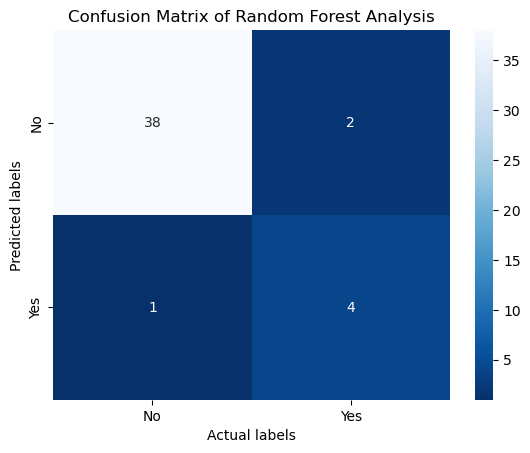

In [91]:
ax= plt.subplot()
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues_r', fmt = 'd', ax=ax)

ax.set_xlabel('Actual labels');ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix of Random Forest Analysis'); 
ax.xaxis.set_ticklabels(['No', 'Yes']); 
ax.yaxis.set_ticklabels(['No', 'Yes']);